<a href="https://www.kaggle.com/code/zeferinoibarraborja/eda-xgboost-nn?scriptVersionId=163766384" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-transactions/sd254_users.csv
/kaggle/input/credit-card-transactions/User0_credit_card_transactions.csv
/kaggle/input/credit-card-transactions/sd254_cards.csv
/kaggle/input/credit-card-transactions/credit_card_transactions-ibm_v2.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/credit-card-transactions/credit_card_transactions-ibm_v2.csv')


# Visualización del conjunto de datos

In [3]:
df.head(5)

User  Card  Year  Month  Day   Time   Amount           Use Chip  \
0     0     0  2002      9    1  06:21  $134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   $38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  $120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  $128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  $104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
2  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
3  3414527459579106770  Monterey Park             CA  91754.0  5651     NaN   
4  5817218446178736267       La Verne             CA  91750.0  5912     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No

# **Limpieza de datos**

Se puede observar que la columna monto esta en un formato no muy conveniente, necesaitamos reconvertirlo a flotante


In [4]:
df['Amount']=df['Amount'].str.replace('$','').astype(float)
df.head(5)

User  Card  Year  Month  Day   Time  Amount           Use Chip  \
0     0     0  2002      9    1  06:21  134.09  Swipe Transaction   
1     0     0  2002      9    1  06:42   38.48  Swipe Transaction   
2     0     0  2002      9    2  06:22  120.34  Swipe Transaction   
3     0     0  2002      9    2  17:45  128.95  Swipe Transaction   
4     0     0  2002      9    3  06:23  104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
2  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
3  3414527459579106770  Monterey Park             CA  91754.0  5651     NaN   
4  5817218446178736267       La Verne             CA  91750.0  5912     NaN   

  Is Fraud?  
0        No  
1        No  
2        No  
3        No  
4        No

**Para poder hacer un análisis temporal mas exacto podemos divider la hora y el minuto de la transaccin y eliminar la información innecesaria de los segundos**

In [5]:
df['hour']=df['Time'].str[0:2]
df['minute']=df['Time'].str[3:5]
df.drop(['Time'],axis=1, inplace=True )
df.head()

User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State      Zip   MCC Errors?  \
0  3527213246127876953       La Verne             CA  91750.0  5300     NaN   
1  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
2  -727612092139916043  Monterey Park             CA  91754.0  5411     NaN   
3  3414527459579106770  Monterey Park             CA  91754.0  5651     NaN   
4  5817218446178736267       La Verne             CA  91750.0  5912     NaN   

  Is Fraud? hour minute  
0        No   06     21  
1        No   06     42  
2        No   06     22  
3        No   17     45  
4        No   06     23

**Obtenermos información sobre el tipo de variables de nuestro dataset
**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Amount          float64
 6   Use Chip        object 
 7   Merchant Name   int64  
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float64
 11  MCC             int64  
 12  Errors?         object 
 13  Is Fraud?       object 
 14  hour            object 
 15  minute          object 
dtypes: float64(2), int64(7), object(7)
memory usage: 2.9+ GB


# Verificamos si el dataset tiene valores nulos en alguno de los atributos

In [7]:
df.isnull().sum()

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
hour                     0
minute                   0
dtype: int64

# Sustituimos los valores nulos en el dataset

In [8]:
df['Merchant State']=df['Merchant State'].fillna('unknown')
df['Zip']=df['Merchant State'].fillna('0')
df['Errors?']=df['Errors?'].fillna('unknown')
df.head(5)


User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State Zip   MCC  Errors?  \
0  3527213246127876953       La Verne             CA  CA  5300  unknown   
1  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
2  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
3  3414527459579106770  Monterey Park             CA  CA  5651  unknown   
4  5817218446178736267       La Verne             CA  CA  5912  unknown   

  Is Fraud? hour minute  
0        No   06     21  
1        No   06     42  
2        No   06     22  
3        No   17     45  
4        No   06     23

In [9]:
df.isnull().sum()

User              0
Card              0
Year              0
Month             0
Day               0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
hour              0
minute            0
dtype: int64

# Análisis de los valores únicos de las variables categóricas 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Amount          float64
 6   Use Chip        object 
 7   Merchant Name   int64  
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             object 
 11  MCC             int64  
 12  Errors?         object 
 13  Is Fraud?       object 
 14  hour            object 
 15  minute          object 
dtypes: float64(1), int64(7), object(8)
memory usage: 2.9+ GB


In [11]:
categoricas = df.select_dtypes(exclude=['number'])
#categoricas = df[['Use Chip','Merchant City','Merchant State','Zip','Errors?']]


In [12]:
categoricas.head()

Use Chip  Merchant City Merchant State Zip  Errors? Is Fraud?  \
0  Swipe Transaction       La Verne             CA  CA  unknown        No   
1  Swipe Transaction  Monterey Park             CA  CA  unknown        No   
2  Swipe Transaction  Monterey Park             CA  CA  unknown        No   
3  Swipe Transaction  Monterey Park             CA  CA  unknown        No   
4  Swipe Transaction       La Verne             CA  CA  unknown        No   

  hour minute  
0   06     21  
1   06     42  
2   06     22  
3   17     45  
4   06     23

# Se puede observar que en el dataframe las variables horas y minutos se guardaron como tipo objeto por lo que se convierten a tipo númerico

In [13]:
df['hour']=df['hour'].astype(int)
df['hour']=df['minute'].astype(int)
df.head()


User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State Zip   MCC  Errors?  \
0  3527213246127876953       La Verne             CA  CA  5300  unknown   
1  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
2  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
3  3414527459579106770  Monterey Park             CA  CA  5651  unknown   
4  5817218446178736267       La Verne             CA  CA  5912  unknown   

  Is Fraud?  hour minute  
0        No    21     21  
1        No    42     42  
2        No    22     22  
3        No    45     45  
4        No    23     23

In [14]:
categoricas = df.select_dtypes(exclude=['number']).drop(columns=['Is Fraud?'])
categoricas.head(5)

Use Chip  Merchant City Merchant State Zip  Errors? minute
0  Swipe Transaction       La Verne             CA  CA  unknown     21
1  Swipe Transaction  Monterey Park             CA  CA  unknown     42
2  Swipe Transaction  Monterey Park             CA  CA  unknown     22
3  Swipe Transaction  Monterey Park             CA  CA  unknown     45
4  Swipe Transaction       La Verne             CA  CA  unknown     23

# Valores únicos de los atributos categóricos

In [15]:
for columna in categoricas:
    valores_unicos = categoricas[columna].unique()
    print(f"Los valores únicos del atributo '{columna}' son:'{valores_unicos}")

Los valores únicos del atributo 'Use Chip' son:'['Swipe Transaction' 'Online Transaction' 'Chip Transaction']
Los valores únicos del atributo 'Merchant City' son:'['La Verne' 'Monterey Park' 'ONLINE' ... 'Alburgh' 'Buskirk' 'Mooers']
Los valores únicos del atributo 'Merchant State' son:'['CA' 'unknown' 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV'
 'NY' 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic'
 'NM' 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO'
 'Italy' 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC'
 'France' 'WV' 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS'
 'New Zealand' 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT'
 'South Korea' 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India

In [16]:
num_valores_unicos_por_columna = categoricas.nunique()
print(num_valores_unicos_por_columna)

Use Chip              3
Merchant City     13429
Merchant State      224
Zip                 224
Errors?              24
minute               60
dtype: int64


# Análisis exploratorio de datos

# Distribución de las variables númericas

# Análisis multivariado

**En este caso el conjunto de datos es bastante grande, por lo cual deberíamos inspeccionar de manera mas intensiva los casos que propician el fraude. Es por ello que nos quedamos con la parte del dataset que contiene los datos de fraude**

In [17]:
df['Is Fraud?'].value_counts()

Is Fraud?
No     24357143
Yes       29757
Name: count, dtype: int64

# Binarización de la variable objetivo

In [18]:
df['Is Fraud?']=df['Is Fraud?'].replace({'Yes':1,'No':0})
df.head()

/tmp/ipykernel_18/2357538841.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Is Fraud?']=df['Is Fraud?'].replace({'Yes':1,'No':0})


User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City Merchant State Zip   MCC  Errors?  \
0  3527213246127876953       La Verne             CA  CA  5300  unknown   
1  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
2  -727612092139916043  Monterey Park             CA  CA  5411  unknown   
3  3414527459579106770  Monterey Park             CA  CA  5651  unknown   
4  5817218446178736267       La Verne             CA  CA  5912  unknown   

   Is Fraud?  hour minute  
0          0    21     21  
1          0    42     42  
2          0    22     22  
3          0    45     45  
4          0    23     23

In [19]:
datos_fraude=df[df['Is Fraud?']==1]
datos_fraude.head()

User  Card  Year  Month  Day  Amount            Use Chip  \
4099     0     0  2015     11   15  287.13  Online Transaction   
4100     0     0  2015     11   15    2.41  Online Transaction   
4101     0     0  2015     11   16   50.81  Online Transaction   
4102     0     0  2015     11   16  248.36  Online Transaction   
4103     0     0  2015     11   16  473.00  Online Transaction   

            Merchant Name Merchant City Merchant State      Zip   MCC  \
4099 -8194607650924472520        ONLINE        unknown  unknown  3001   
4100 -7759074308363763111        ONLINE        unknown  unknown  5651   
4101  -551332107213382088        ONLINE        unknown  unknown  4411   
4102  4872340518840476610        ONLINE        unknown  unknown  5732   
4103 -8566951830324093739        ONLINE        unknown  unknown  3640   

      Errors?  Is Fraud?  hour minute  
4099  unknown          1    55     55  
4100  unknown          1    19     19  
4101  unknown          1    41     41  
4102  unknown          1    46     46  
4103  unknown          1    20     20

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

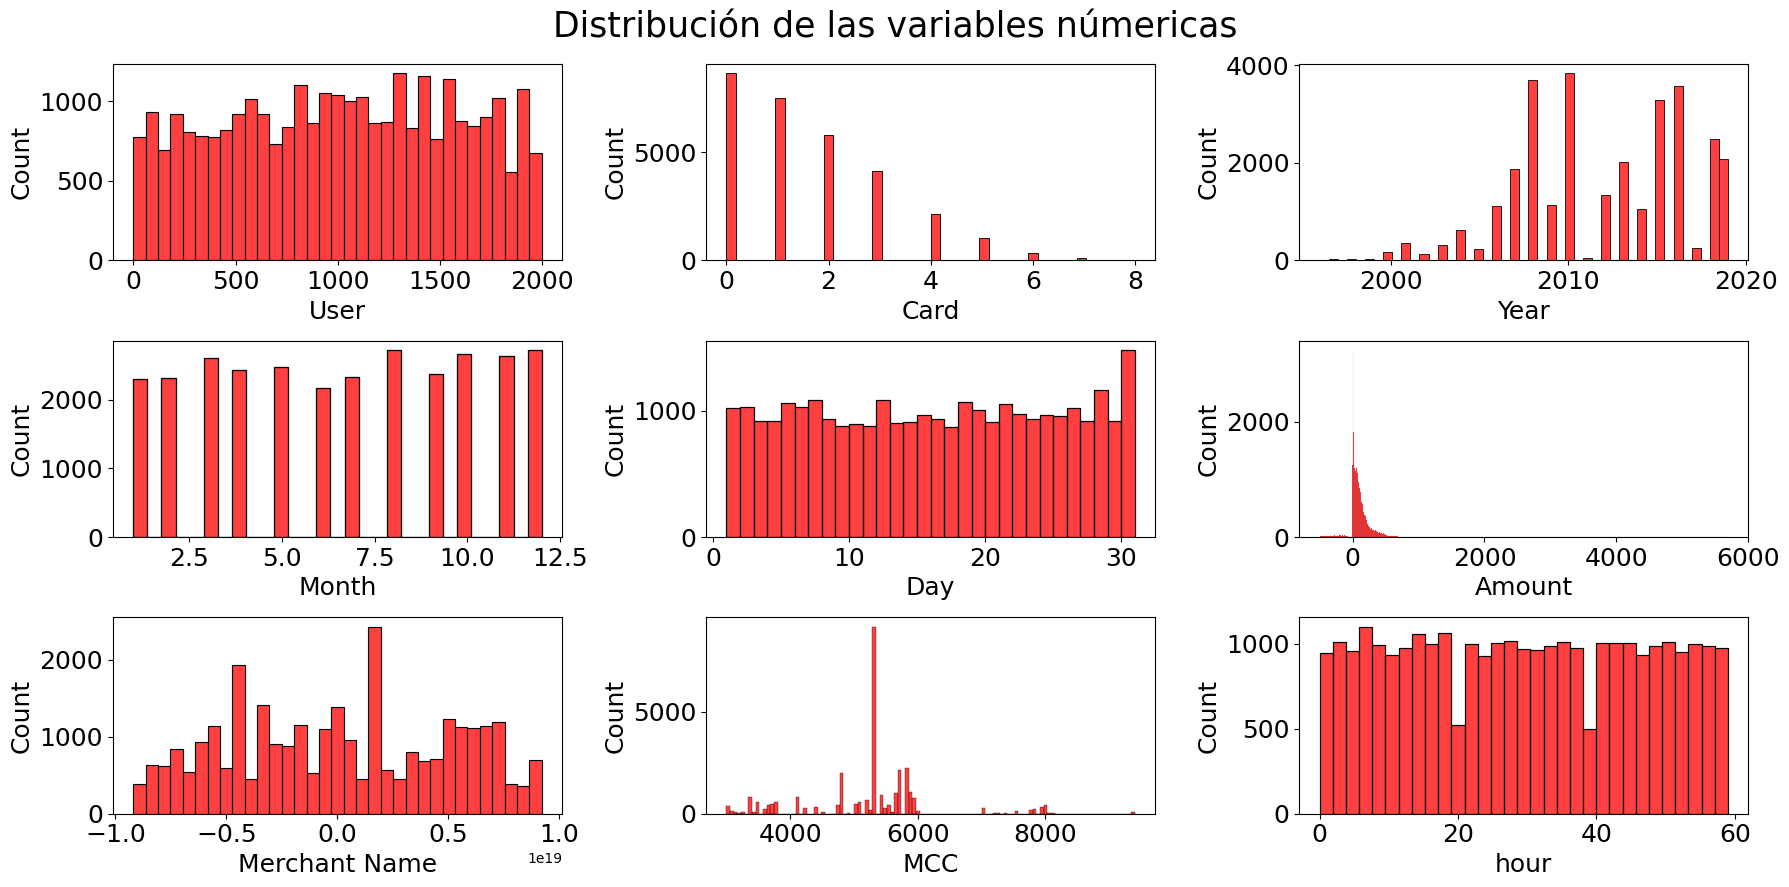

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 9))
for i,col in enumerate(datos_fraude.drop(['Is Fraud?'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)  # Creamos una gráfica para cada columna.
    sns.histplot(data=datos_fraude, x=col, ax=ax, color='red', kde=False)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Distribución de las variables númericas',fontsize=25)
plt.tight_layout()


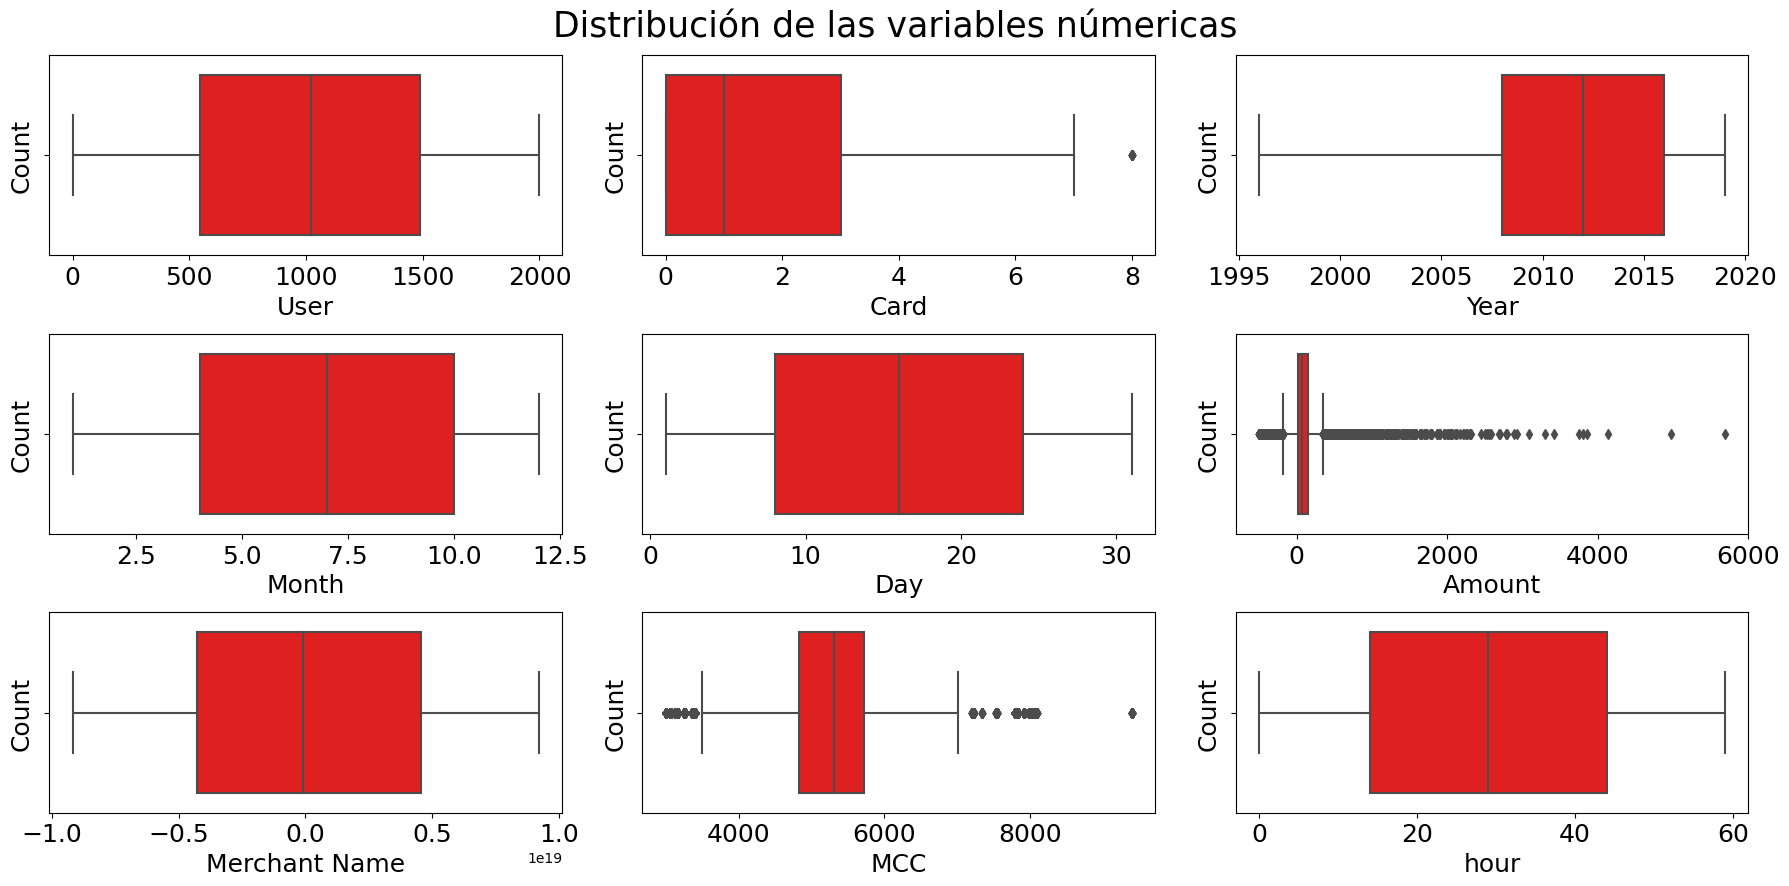

In [21]:
plt.figure(figsize=(18, 9))
for i,col in enumerate(datos_fraude.drop(['Is Fraud?'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)  # Creamos una gráfica para cada columna.
    sns.boxplot(data=datos_fraude, x=col, ax=ax, color='red')
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Count', fontsize=18)
    
plt.suptitle('Distribución de las variables númericas',fontsize=25)
plt.tight_layout()


# Análisis multivariado

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:69: RuntimeWarning: overflow encountered in scalar subtract
  rdelta_ext = (rmax_ - rmin_) * range_padding / 2
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


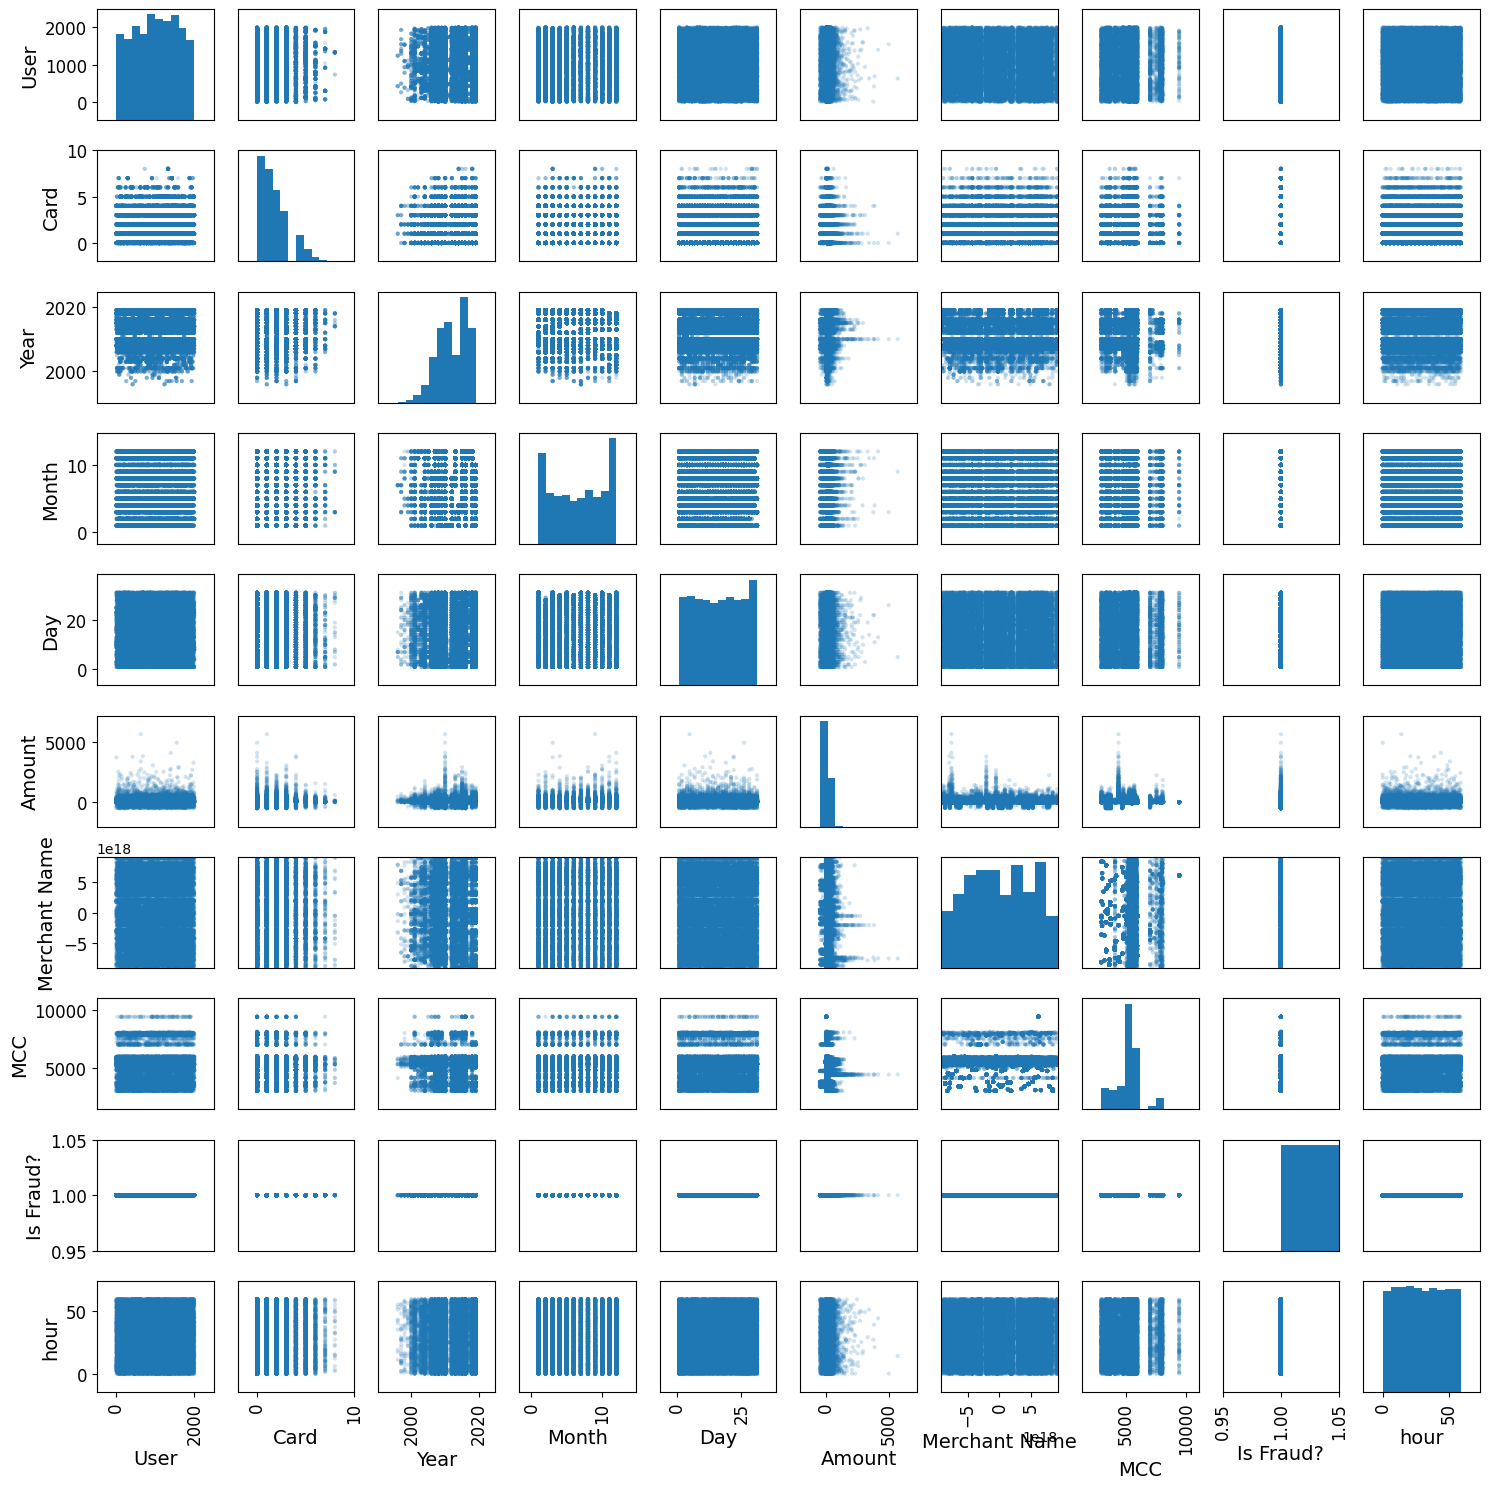

In [22]:
import pandas as pd
# Obtener solo las columnas numéricas del DataFrame
num_columns = datos_fraude.select_dtypes(include=['int64', 'float64'])
scatter_matrix = pd.plotting.scatter_matrix(num_columns, alpha=0.2,
                                            grid=False,diagonal='hist', marker='.',range_padding=0.5, figsize=(15, 15))

# Adjust axis labels to avoid overlap and change label size
for ax in scatter_matrix.flatten():
    	ax.tick_params(axis='both', labelsize=12)
    	ax.xaxis.label.set_size(14)
    	ax.yaxis.label.set_size(14)

plt.tight_layout()

plt.show()


# Matriz de correlacción de las variables númericas

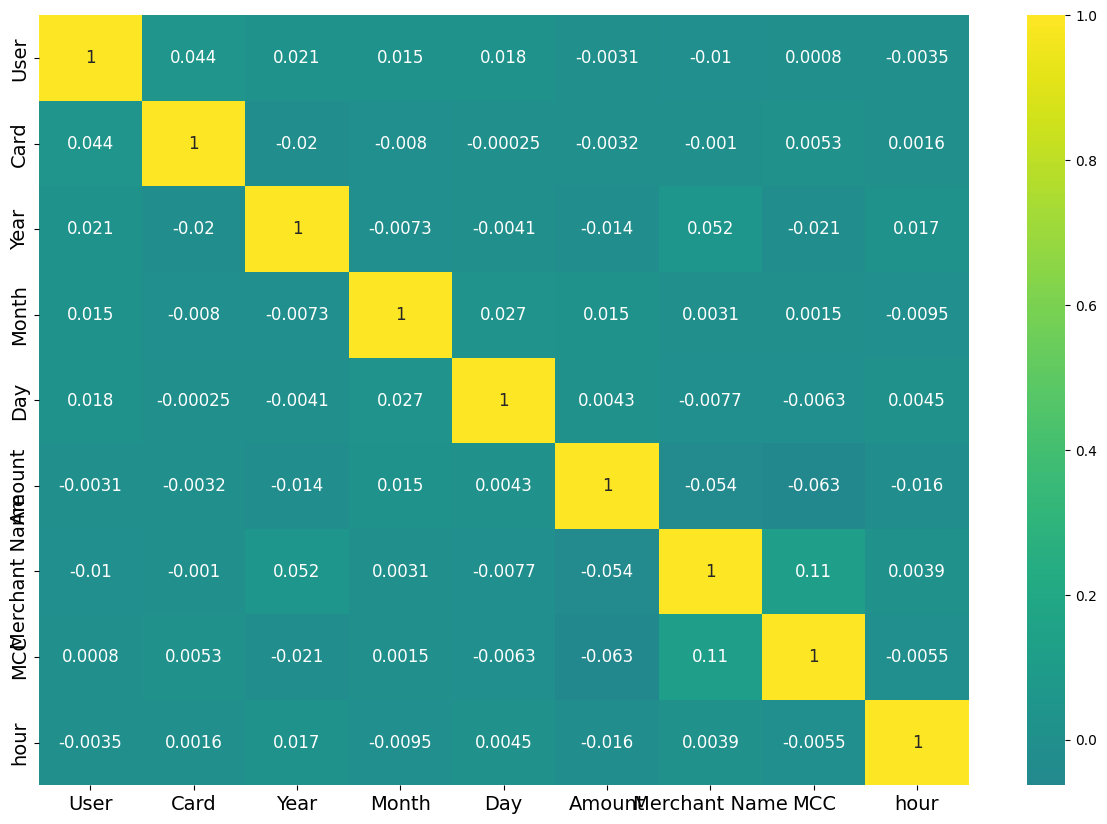

In [23]:
# Podemos visualizar las correlaciones entre variables utilizando una matriz de correlación (heatmap)
plt.figure(figsize=(15, 10))
sns.heatmap(datos_fraude.drop(['Is Fraud?'],axis=1).select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='viridis',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


**Parece no haber correlación entre las variables incluso filtrando las operaciones con Fraude, por lo que no eliminaremos variables por el momento para el entrenamiento**

In [24]:
df['Is Fraud?'].value_counts()

Is Fraud?
0    24357143
1       29757
Name: count, dtype: int64

# Visualización del comportamiento de la variabla objetivo en las variables númericas

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

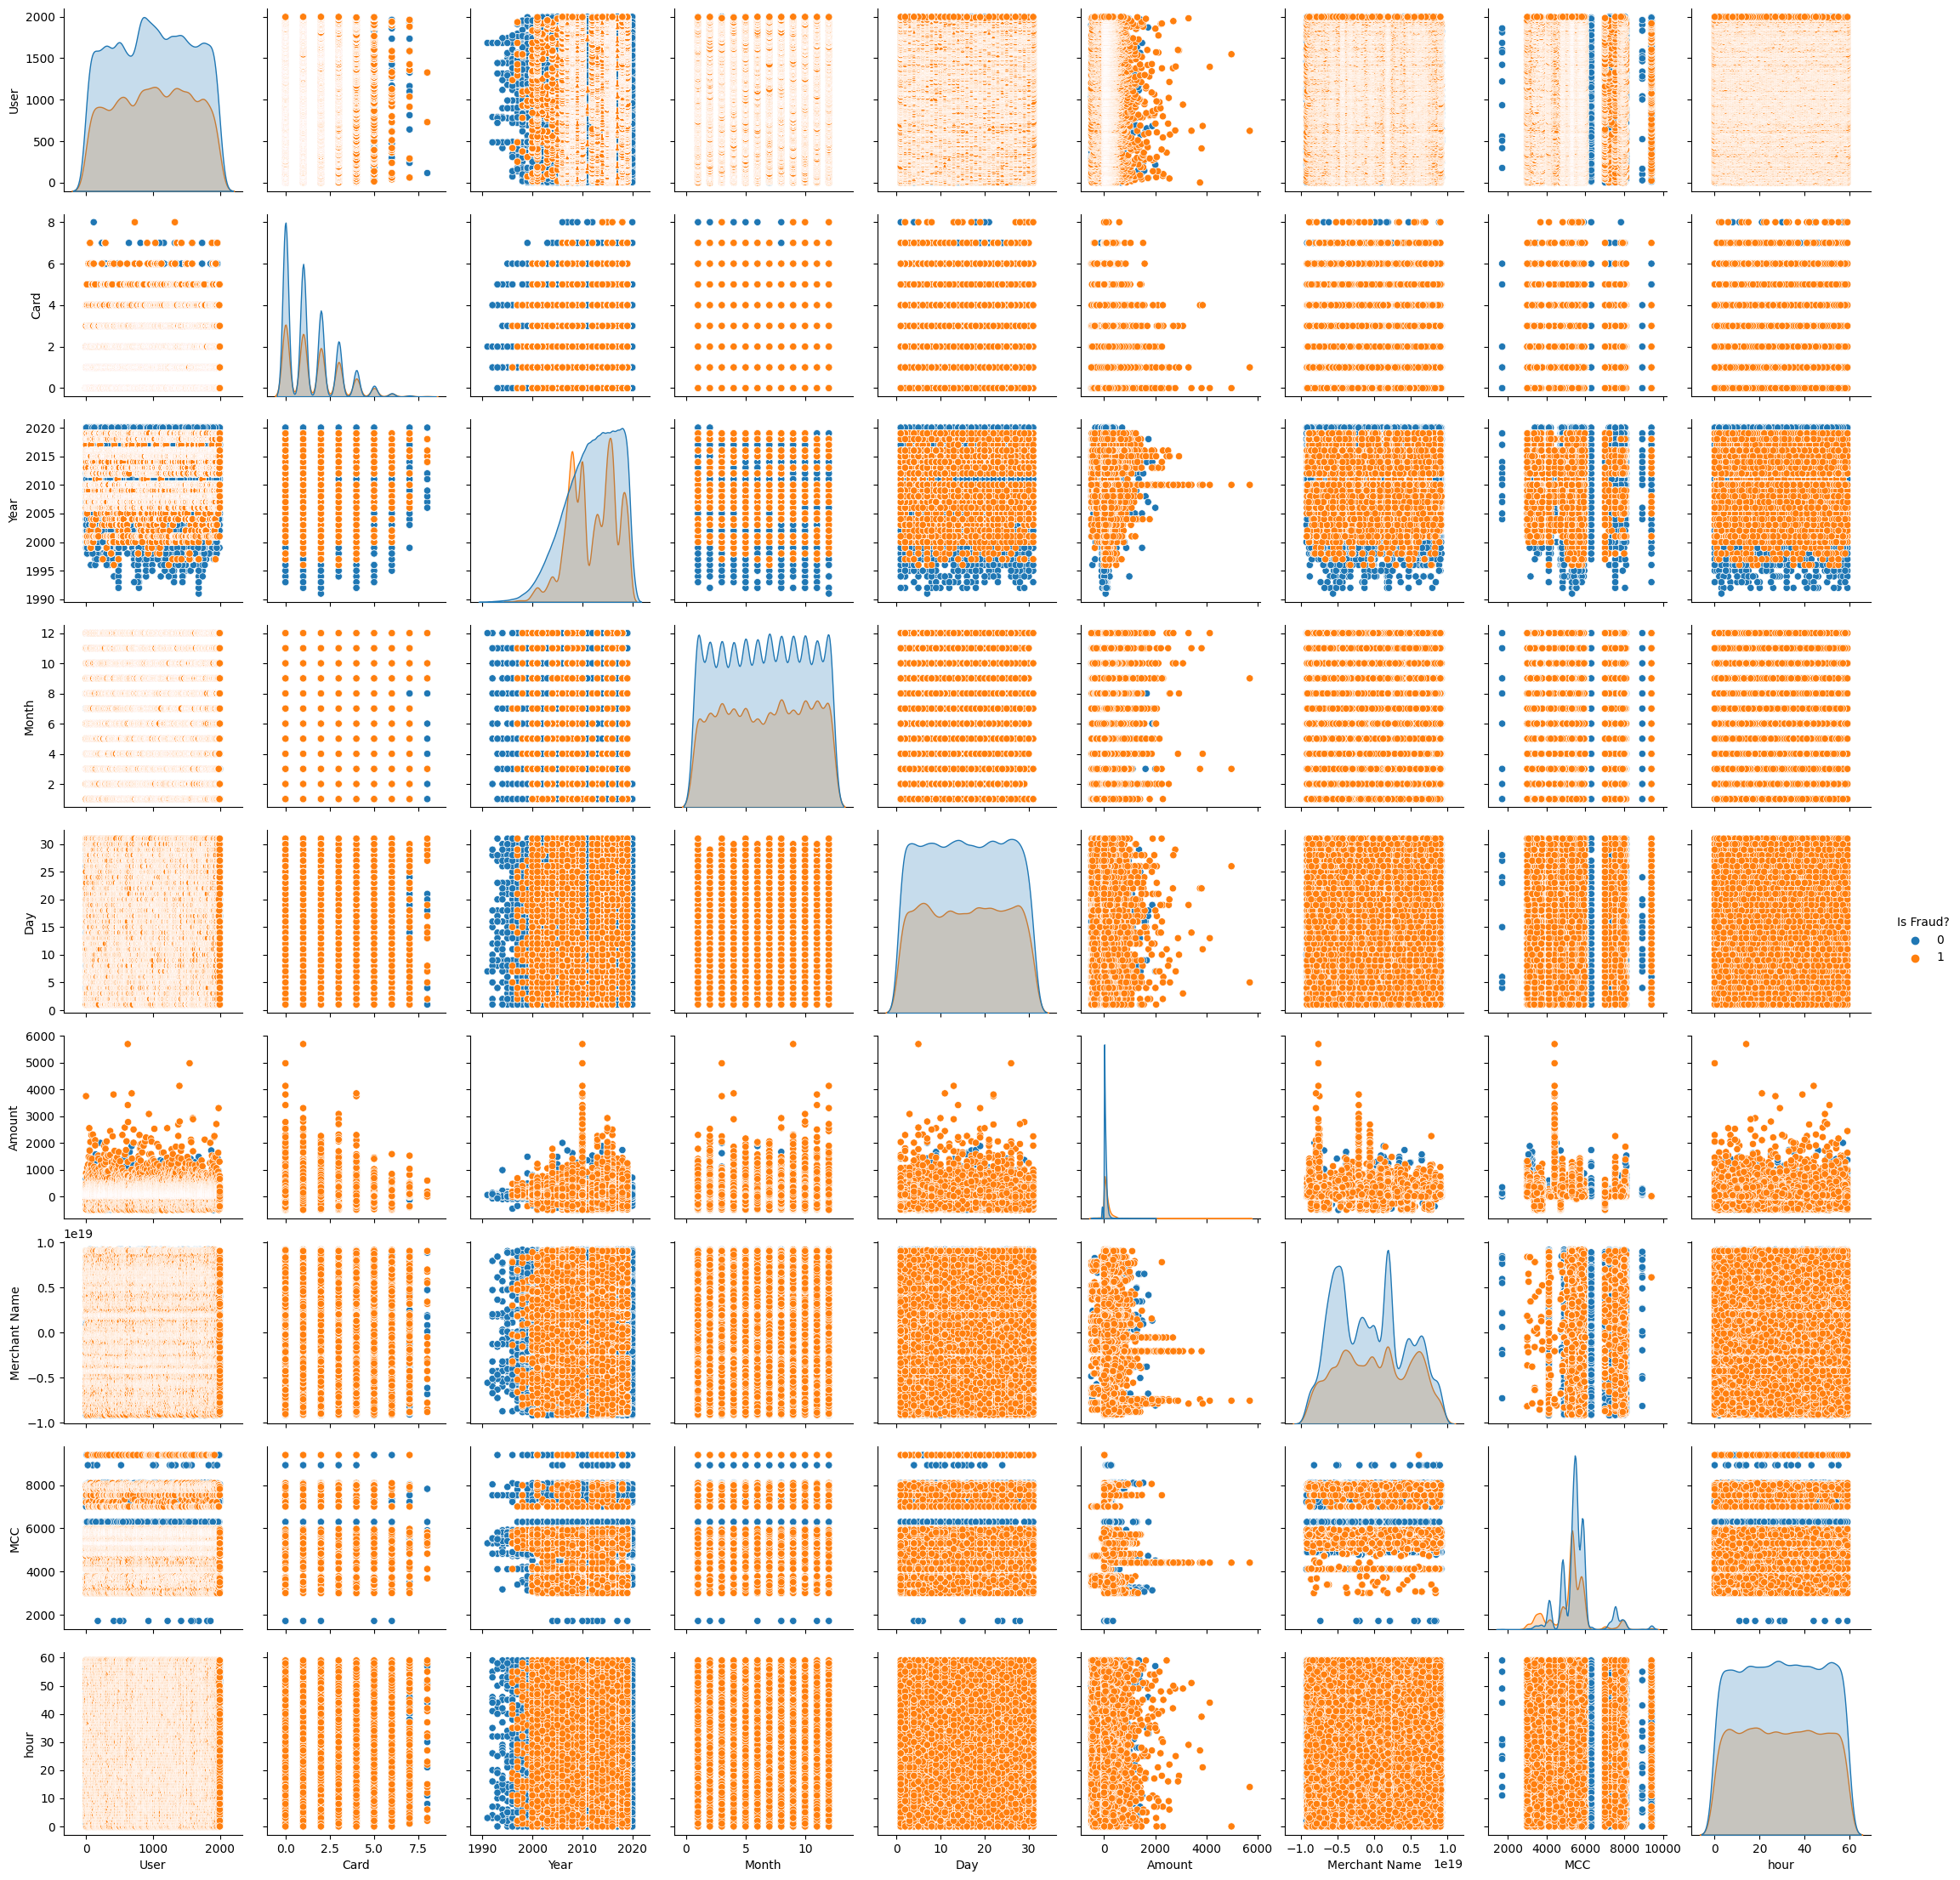

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos donde Attrition_Flag es igual a 0 y muestrear aleatoriamente
df_attrition_0 = df[df['Is Fraud?'] == 0].sample(frac=0.002, random_state=42)  # Ajusta frac según sea necesario

# Filtrar los datos donde Attrition_Flag es igual a 1
df_attrition_1 = df[df['Is Fraud?'] == 1]

# Concatenar los datos
df_concatenated = pd.concat([df_attrition_0, df_attrition_1])

# Crear el pairplot con los datos concatenados
sns.pairplot(df_concatenated, hue='Is Fraud?')
plt.show()

**No pareciera haber un comportamiento significativamente distinto en las variables númericas con respecto a la variable objetivo, por lo que no eliminaremos ninguna variable númerica del entrenamiento del modelo**

# Análisis univariado

**Análisis univariado se refiere al examen y estudio de una sola variable de manera aislada, sin considerar su relación con otras variables (especialmente útil en variables categóricas)**

Ya que es código que puede reutilizarse conviene utilizar POO para encapsular el gráfico


In [26]:
class CategoricalPlotter:
    def __init__(self, data):
        self.data = data
        sns.set(style="whitegrid")
        sns.set_palette("Set1")

    def plot_variable(self, variable, hue_variable='Attrition_Flag',bins=None):
        plt.figure(figsize=(18, 6))
        sns.countplot(x=variable, data=self.data, hue=hue_variable, edgecolor='black')
        plt.xlabel(variable, fontsize=18)
        plt.ylabel("Customers", fontsize=18)
        plt.title(f"{variable} vs Is Fraud?", fontsize=18)
        legend = plt.legend(title="Response", labels=["No", "Yes"], fontsize=14)
        legend.get_frame().set_facecolor('0.9')
        legend.get_frame().set_alpha(0.8)
        plt.xticks(rotation=90)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Amount          float64
 6   Use Chip        object 
 7   Merchant Name   int64  
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             object 
 11  MCC             int64  
 12  Errors?         object 
 13  Is Fraud?       int64  
 14  hour            int64  
 15  minute          object 
dtypes: float64(1), int64(9), object(6)
memory usage: 2.9+ GB


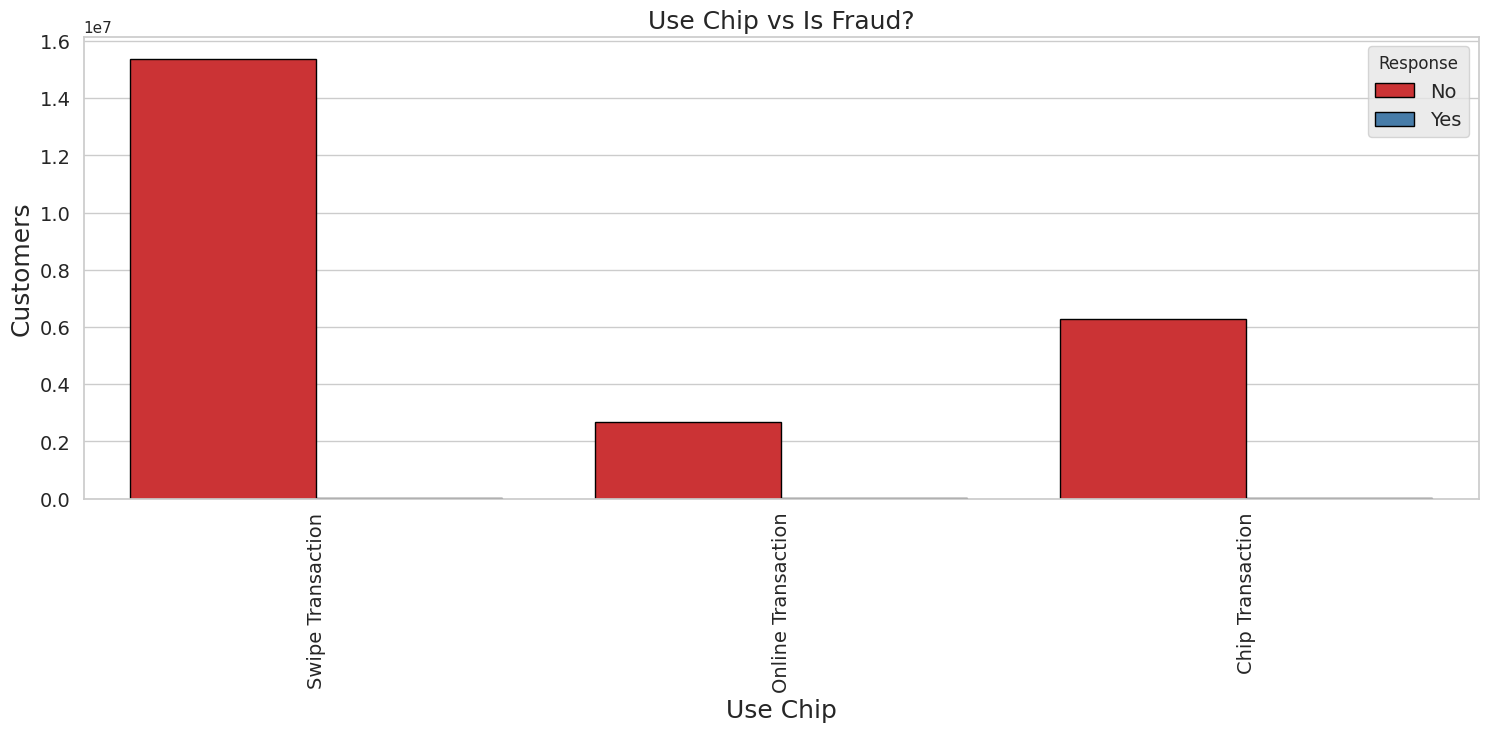

In [28]:
categorical_plotter = CategoricalPlotter(df)
categorical_plotter.plot_variable('Use Chip', hue_variable='Is Fraud?')


**Como podemos ver, la clase dominante es el "no hay fraude", en una proporción muy grande, por lo que este tipo de gráficas no es muy útil en este caso**

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class DonutChartPlotter:
    def __init__(self, data, variable1, variable2, num_columns=1):
        self.data = data
        self.variable1 = variable1
        self.variable2 = variable2
        self.num_columns = num_columns
        sns.set(style="whitegrid")
        sns.set_palette("pastel")

    def plot_donut_charts(self):
        # Calculate the percentages
        attribute_percents = self.data.groupby(self.variable1)[self.variable2].value_counts(normalize=True).unstack()
        attribute_percents.reset_index(inplace=True)
        attribute_percents.fillna(0, inplace=True)

        # Create a DataFrame with the percentages
        attribute_percent_table = attribute_percents.rename(columns={0: 'No_Percentage', 1: 'Yes_Percentage'})

        # Format percentages as percentage notation
        attribute_percent_table['No_Percentage'] = attribute_percent_table['No_Percentage'].apply(lambda x: x * 100)
        attribute_percent_table['Yes_Percentage'] = attribute_percent_table['Yes_Percentage'].apply(lambda x: x * 100)

        # Sort the table in descending order of "Yes_Percentage"
        attribute_percent_table = attribute_percent_table.sort_values(by='Yes_Percentage', ascending=False)

        # Use the "pastel" color palette from Seaborn
        custom_palette = sns.color_palette("pastel")

        # Calculate the number of rows needed
        num_rows = len(attribute_percent_table) // self.num_columns
        if len(attribute_percent_table) % self.num_columns != 0:
            num_rows += 1

        # Create a figure with subplots
        fig, axes = plt.subplots(nrows=num_rows, ncols=self.num_columns, figsize=(15, 5 * num_rows))

        # Flatten the array of subplots for iteration
        axes = axes.flatten()

        # Create donut charts for each value in the specified variable
        for index, row in attribute_percent_table.iterrows():
            labels = ['No', 'Yes']
            sizes = [row['No_Percentage'], row['Yes_Percentage']]
            explode = (0.1, 0)  # Explode the first slice (No)

            ax = axes[index]
            patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=custom_palette,
                                               autopct='%1.1f%%', shadow=True, startangle=90,
                                               textprops={'fontsize': 18})
            for text in texts:
                text.set_fontsize(20)
            for autotext in autotexts:
                autotext.set_fontsize(20)

            ax.axis('equal')
            ax.set_title(row[self.variable1], fontsize=25)

        # Remove unused subplots
        for i in range(len(attribute_percent_table), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()


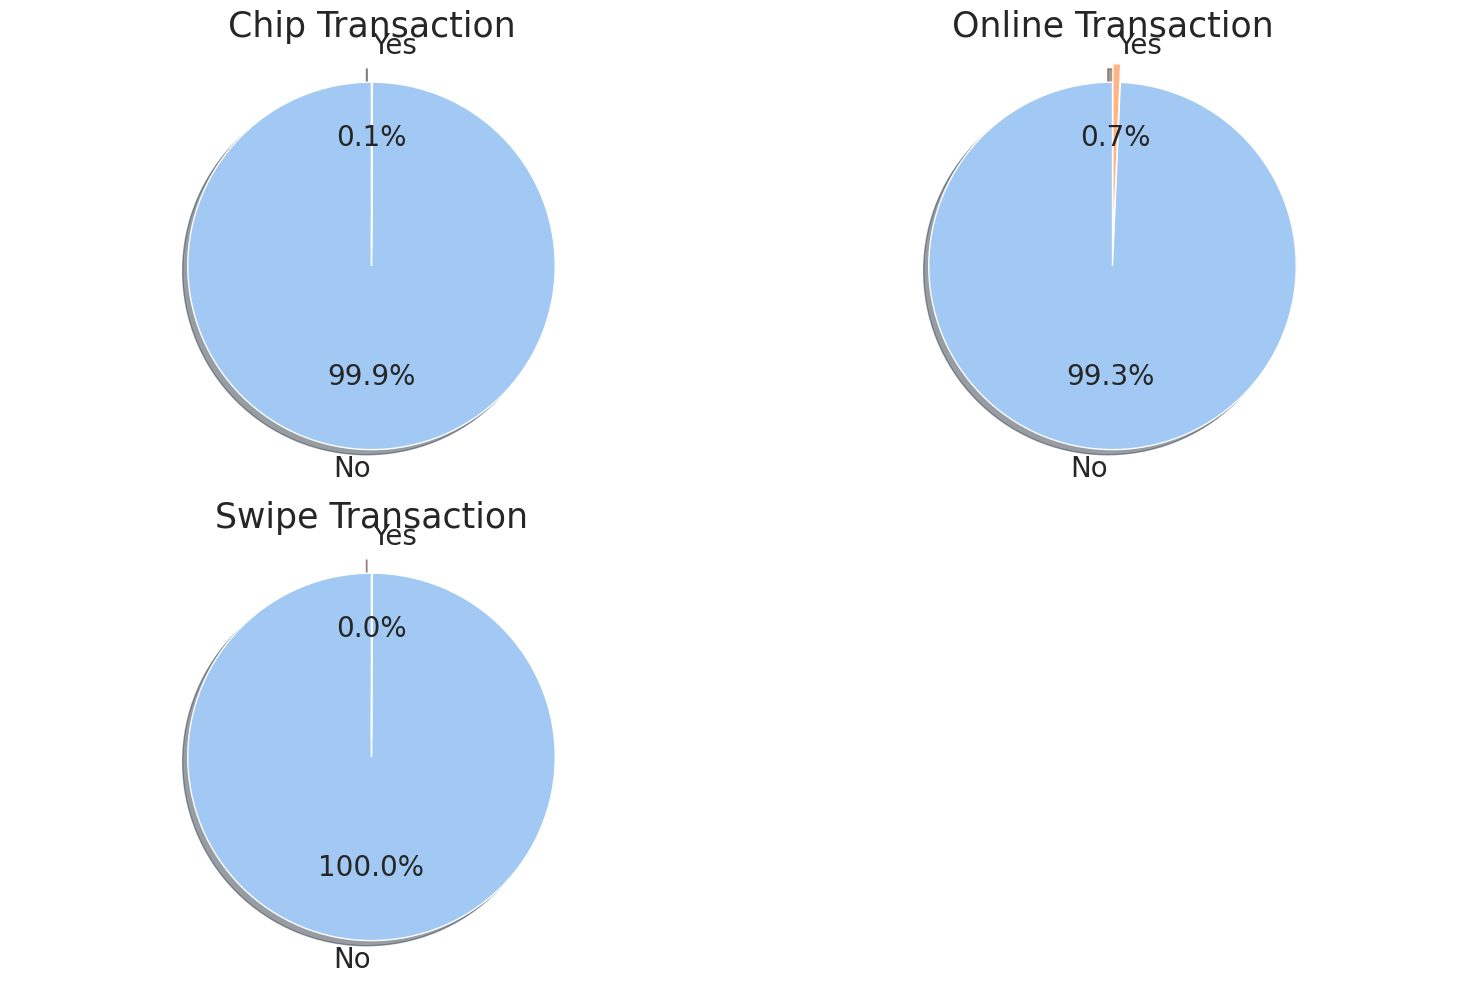

In [30]:
donut_chart_plotter = DonutChartPlotter(df, 'Use Chip', 'Is Fraud?', num_columns=2)
donut_chart_plotter.plot_donut_charts()


# Podemos notar que la gran mayoría de las transacciones fraudulentas se llevan a cabo mediante transacciones en línea, por lo que este atributo parece tener gran influencia 

In [31]:
No=df[df['Is Fraud?']==0]['Merchant City'].nunique()
Si=df[df['Is Fraud?']==1]['Merchant City'].nunique()
print('No. de ciudades donde no hubo fraude:',No)
print('No. de ciudades donde no hubo fraude:',Si)

No. de ciudades donde no hubo fraude: 13397
No. de ciudades donde no hubo fraude: 1973


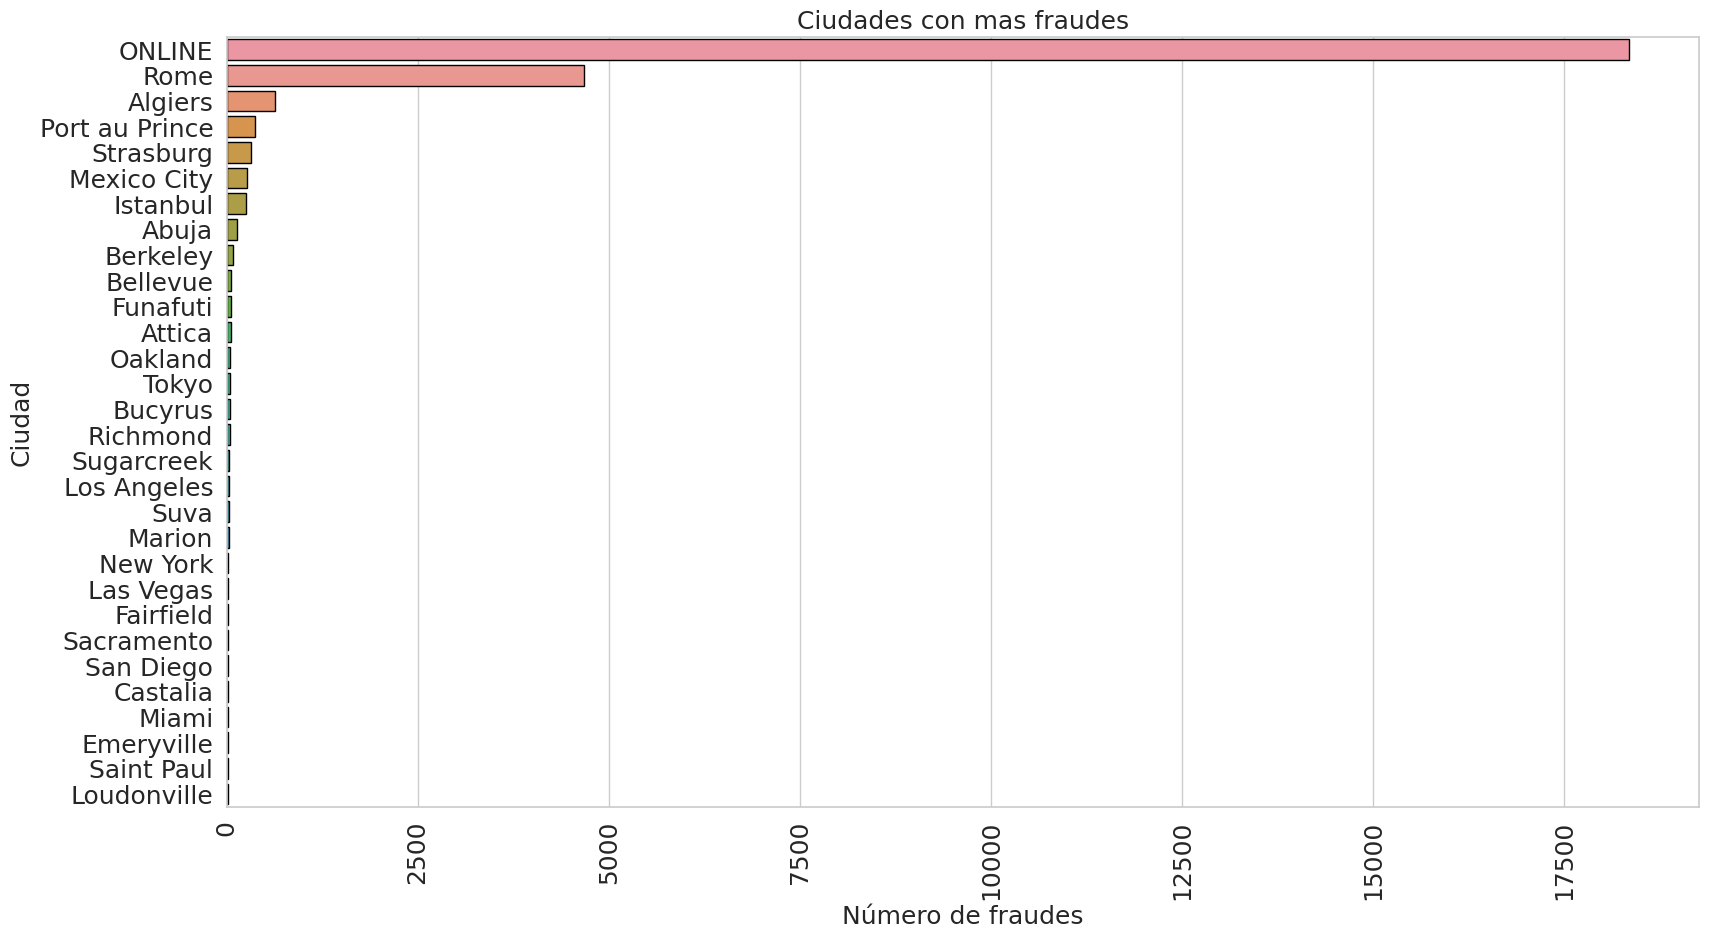

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(19,10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
ciudades_top=df[df['Is Fraud?']==1]['Merchant City'].value_counts().head(30).index
sns.countplot(data=df[df['Is Fraud?']==1],y='Merchant City',order=ciudades_top,edgecolor='black')
plt.title('Ciudades con mas fraudes',fontsize=18)
plt.xlabel("Número de fraudes",fontsize=18)
plt.ylabel("Ciudad",fontsize=18)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Podemos observar que la mayoría de las estafas se realizan vía online, por lo que parece ser un atributo que influye en la probabilidad de que la transacción sea un fraude o no

In [33]:
No=df[df['Is Fraud?']==0]['Merchant State'].nunique()
Si=df[df['Is Fraud?']==1]['Merchant State'].nunique()
print('No. de estados/países donde no hubo fraude:',No)
print('No. de estados/países donde no hubo fraude:',Si)

No. de estados/países donde no hubo fraude: 223
No. de estados/países donde no hubo fraude: 61


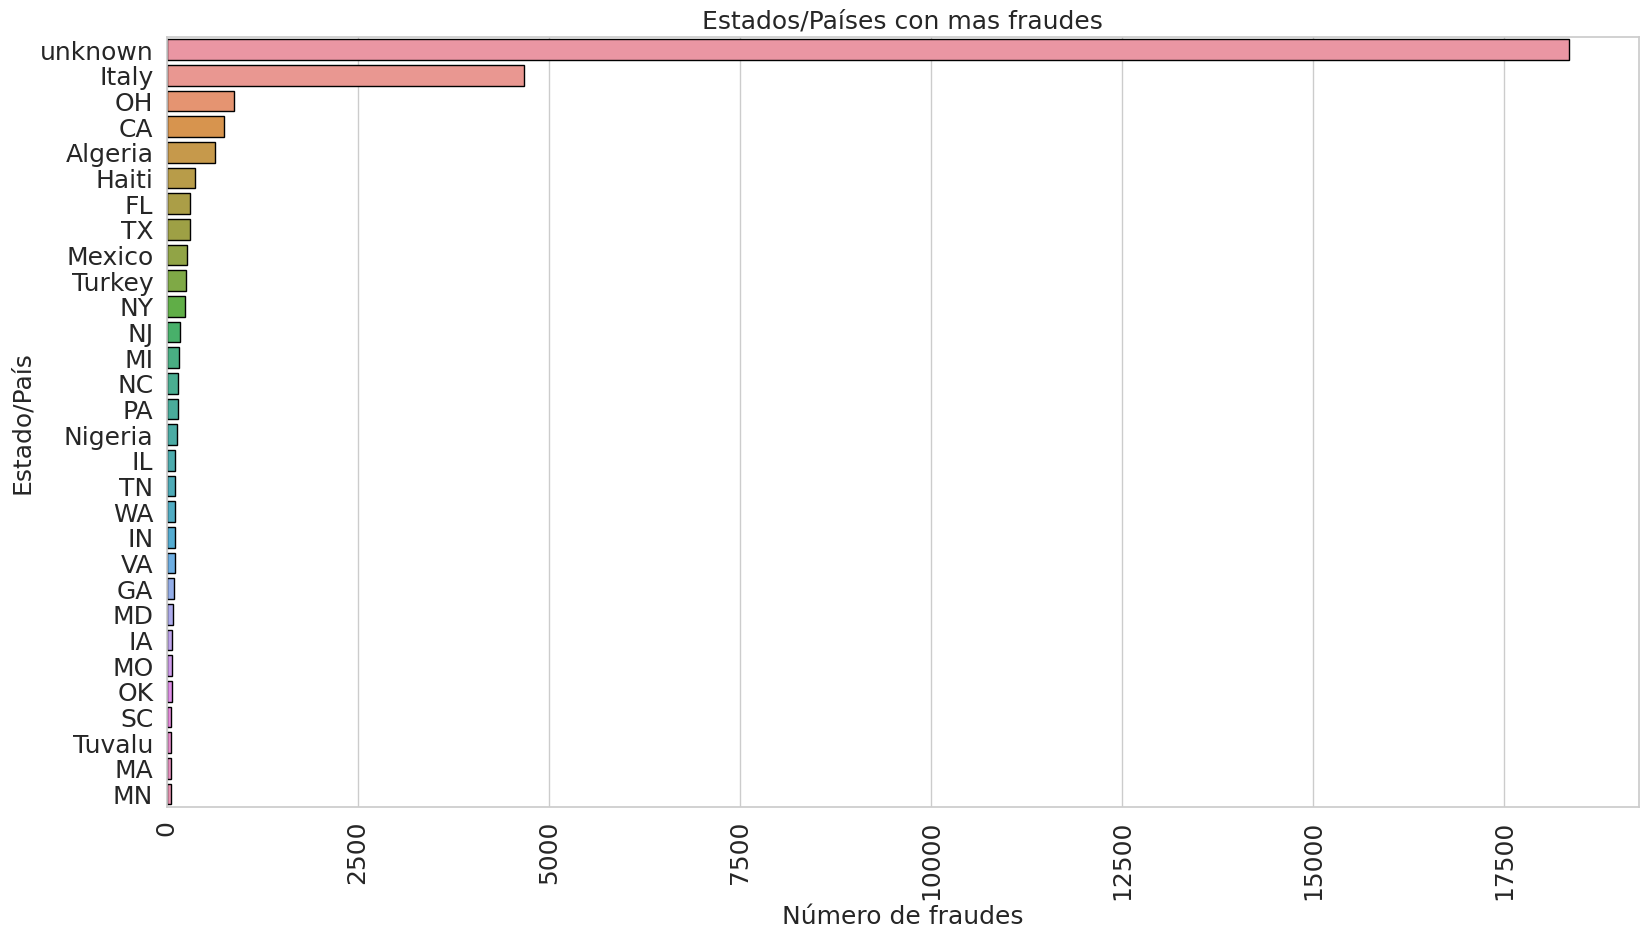

In [34]:
plt.figure(figsize=(19,10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
ciudades_top=df[df['Is Fraud?']==1]['Merchant State'].value_counts().head(30).index
sns.countplot(data=df[df['Is Fraud?']==1],y='Merchant State',order=ciudades_top,edgecolor='black')
plt.title('Estados/Países con mas fraudes',fontsize=18)
plt.xlabel("Número de fraudes",fontsize=18)
plt.ylabel("Estado/País",fontsize=18)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Podemos observar que la mayoría de las estafas se realizan en países desconocidos y también en Italia , por lo que parece ser un atributo que influye en la probabilidad de que la transacción sea un fraude o no

In [35]:
No=df[df['Is Fraud?']==0]['Zip'].nunique()
Si=df[df['Is Fraud?']==1]['Zip'].nunique()
print('Códigos postales donde no hubo fraude:',No)
print('Códigos postals donde no hubo fraude:',Si)

Códigos postales donde no hubo fraude: 223
Códigos postals donde no hubo fraude: 61


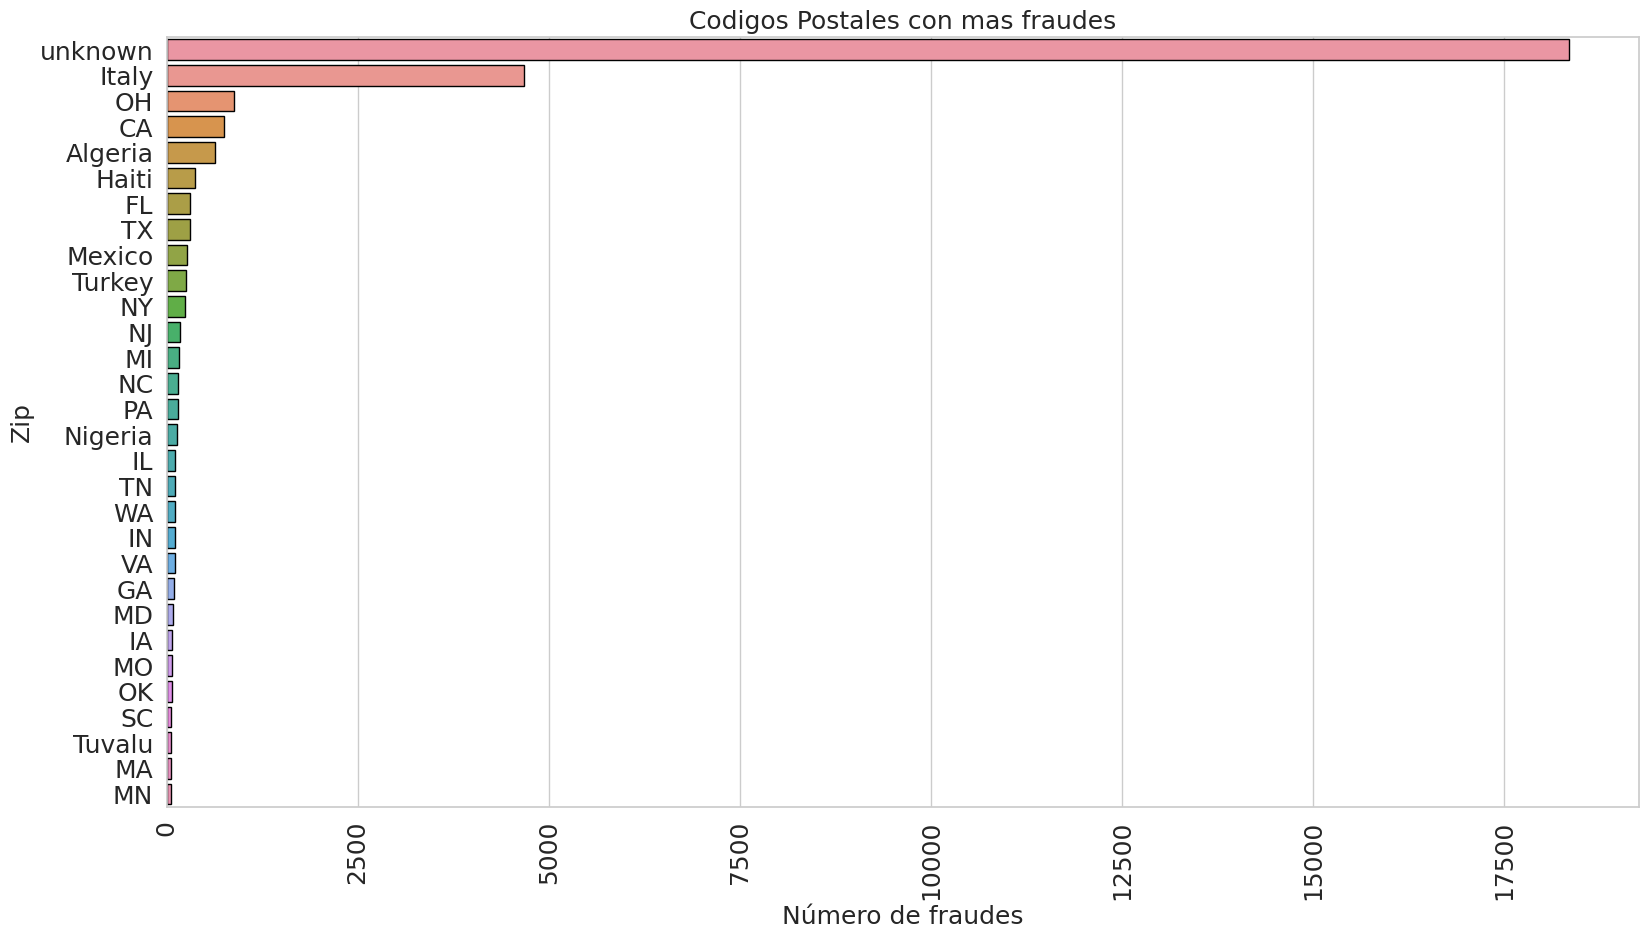

In [36]:
plt.figure(figsize=(19,10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
ciudades_top=df[df['Is Fraud?']==1]['Zip'].value_counts().head(30).index
sns.countplot(data=df[df['Is Fraud?']==1],y='Zip',order=ciudades_top,edgecolor='black')
plt.title('Codigos Postales con mas fraudes',fontsize=18)
plt.xlabel("Número de fraudes",fontsize=18)
plt.ylabel("Zip",fontsize=18)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

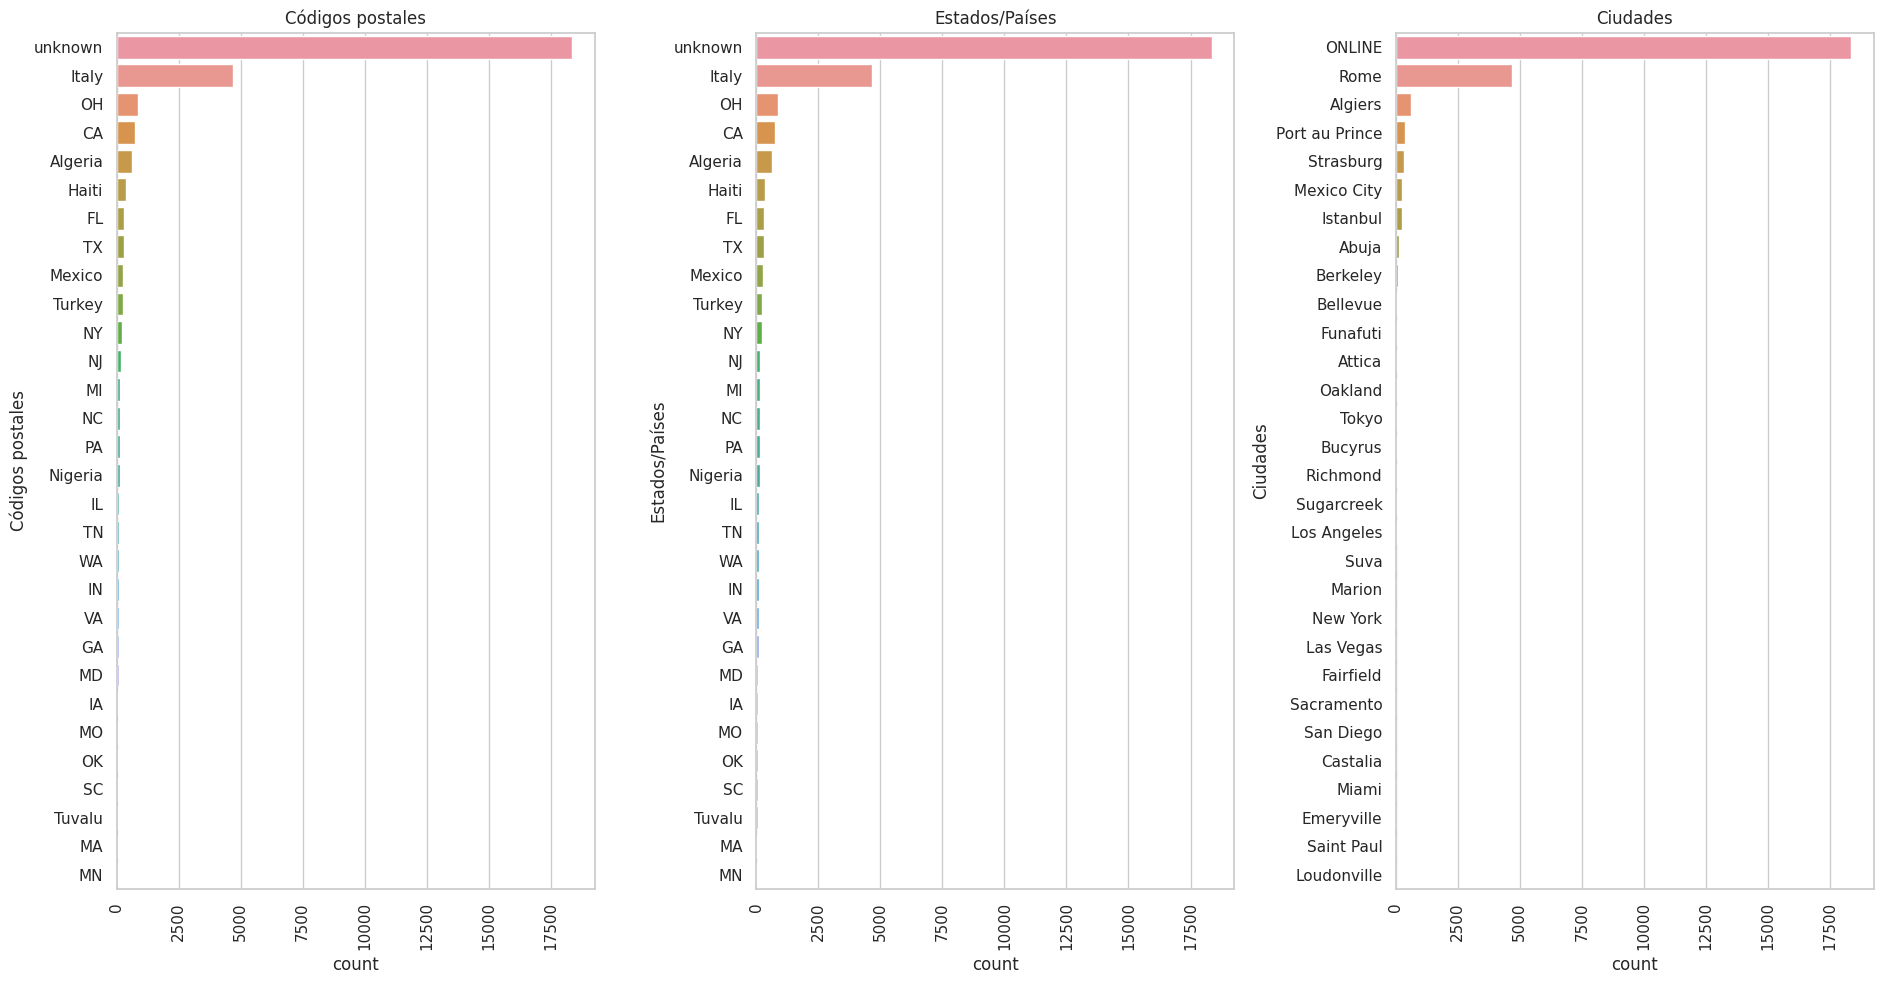

In [37]:
import matplotlib.pyplot as plt

cp_top=df[df['Is Fraud?']==1]['Zip'].value_counts().head(30).index
estados_top=df[df['Is Fraud?']==1]['Merchant State'].value_counts().head(30).index
ciudades_top=df[df['Is Fraud?']==1]['Merchant City'].value_counts().head(30).index

fig,axs =plt.subplots(1,3, figsize=(19,10))
sns.countplot(data=df[df['Is Fraud?']==1],y='Zip',order=cp_top, ax=axs[0])
axs[0].set_title('Códigos postales')
axs[0].set_label('Cuentas')
axs[0].set_ylabel('Códigos postales')
axs[0].tick_params(axis='x',rotation=90)

sns.countplot(data=df[df['Is Fraud?']==1],y='Merchant State',order=estados_top, ax=axs[1])
axs[1].set_title('Estados/Países')
axs[1].set_label('Cuentas')
axs[1].set_ylabel('Estados/Países')
axs[1].tick_params(axis='x',rotation=90)

sns.countplot(data=df[df['Is Fraud?']==1],y='Merchant City',order=ciudades_top, ax=axs[2])
axs[2].set_title('Ciudades')
axs[2].set_label('Cuentas')
axs[2].set_ylabel('Ciudades')
axs[2].tick_params(axis='x',rotation=90)


plt.tight_layout()
plt.show()

# Al graficar las variables geográficas parece haber una alta correlacción entre ellas, es necesario determinar el grado de correlación entre las variables categóricas

In [38]:
!pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 23.2 which is incompatible.
jupyterlab 4.0.11 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.


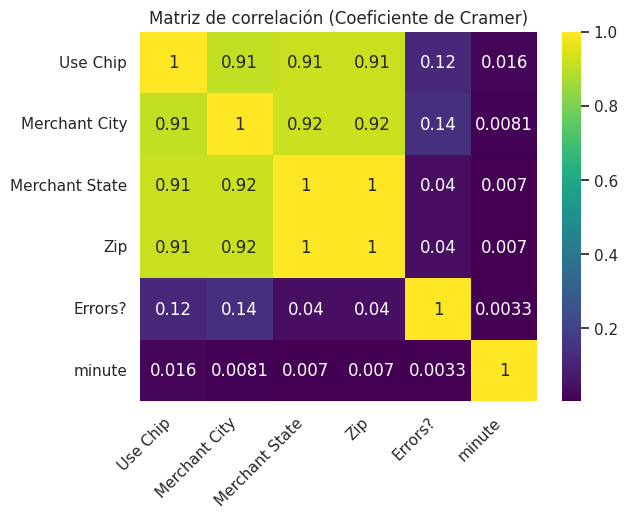

In [39]:
import pandas as pd
import pingouin as pg
from scipy.stats import chi2_contingency


variables_categoricas = df[df['Is Fraud?']==1].select_dtypes(include=['object'])

# Función para calcular el coeficiente de correlación de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular la matriz de correlación utilizando el coeficiente de correlación de Cramer
num_variables = len(variables_categoricas.columns)
cramer_corr = np.zeros((num_variables, num_variables))
for i in range(num_variables):
    for j in range(num_variables):
        cramer_corr[i, j] = cramers_v(variables_categoricas.iloc[:, i], variables_categoricas.iloc[:, j])

# Visualizar la matriz de correlación utilizando Seaborn
ax = sns.heatmap(cramer_corr, annot=True, cmap='viridis', annot_kws={'size': 12})
ax.set_xticklabels(variables_categoricas.columns, rotation=45, ha='right')
ax.set_yticklabels(variables_categoricas.columns, rotation=0)
plt.title('Matriz de correlación (Coeficiente de Cramer)')
plt.show()

# Pareciera que hay 4 variables altamente correclacionadas, sin embargo nos quedaremos con USE chip ya que solo tiene 3 valores únicos, mientras que las variables de ciudad-estad-código postal estan altamente relacionadas, nos quedaremos con la ciudad ya que inicialmente no tenía valores faltantes en demasia.

In [40]:
df.drop(['Merchant State','Zip'],axis=1, inplace=True)


In [41]:
df.head()

User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City   MCC  Errors?  Is Fraud?  hour minute  
0  3527213246127876953       La Verne  5300  unknown          0    21     21  
1  -727612092139916043  Monterey Park  5411  unknown          0    42     42  
2  -727612092139916043  Monterey Park  5411  unknown          0    22     22  
3  3414527459579106770  Monterey Park  5651  unknown          0    45     45  
4  5817218446178736267       La Verne  5912  unknown          0    23     23

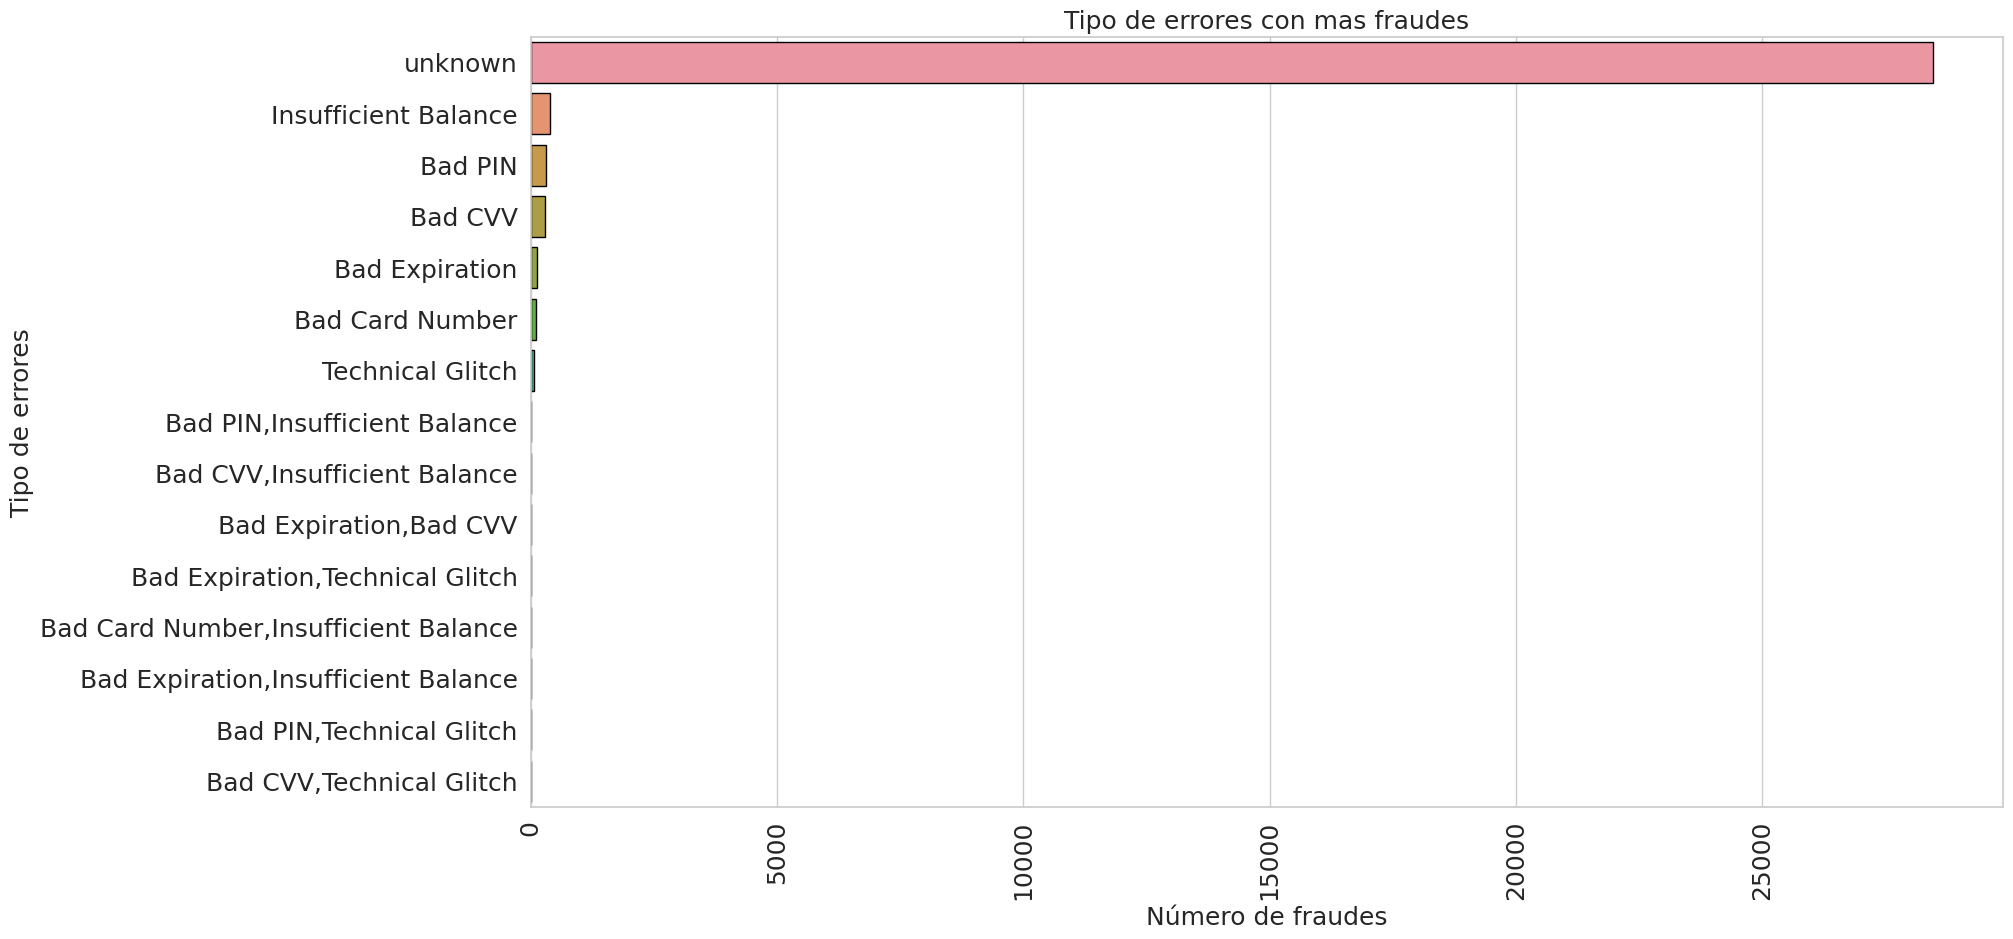

In [42]:
plt.figure(figsize=(19,10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
ciudades_top=df[df['Is Fraud?']==1]['Errors?'].value_counts().head(30).index
sns.countplot(data=df[df['Is Fraud?']==1],y='Errors?',order=ciudades_top,edgecolor='black')
plt.title('Tipo de errores con mas fraudes',fontsize=18)
plt.xlabel("Número de fraudes",fontsize=18)
plt.ylabel("Tipo de errores",fontsize=18)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [43]:
df.head()

User  Card  Year  Month  Day  Amount           Use Chip  \
0     0     0  2002      9    1  134.09  Swipe Transaction   
1     0     0  2002      9    1   38.48  Swipe Transaction   
2     0     0  2002      9    2  120.34  Swipe Transaction   
3     0     0  2002      9    2  128.95  Swipe Transaction   
4     0     0  2002      9    3  104.71  Swipe Transaction   

         Merchant Name  Merchant City   MCC  Errors?  Is Fraud?  hour minute  
0  3527213246127876953       La Verne  5300  unknown          0    21     21  
1  -727612092139916043  Monterey Park  5411  unknown          0    42     42  
2  -727612092139916043  Monterey Park  5411  unknown          0    22     22  
3  3414527459579106770  Monterey Park  5651  unknown          0    45     45  
4  5817218446178736267       La Verne  5912  unknown          0    23     23

# Podemos observar que las variables de Usuario y Card a pesar de ser variables númericas no son de relevancia para llevar a cabo el entremaniento, ya que parecen ser mas índices que atributos, por lo que podemos prescindir de ellas 

In [44]:
df.drop(['User','Card'], axis=1, inplace=True)
df.head()

Year  Month  Day  Amount           Use Chip        Merchant Name  \
0  2002      9    1  134.09  Swipe Transaction  3527213246127876953   
1  2002      9    1   38.48  Swipe Transaction  -727612092139916043   
2  2002      9    2  120.34  Swipe Transaction  -727612092139916043   
3  2002      9    2  128.95  Swipe Transaction  3414527459579106770   
4  2002      9    3  104.71  Swipe Transaction  5817218446178736267   

   Merchant City   MCC  Errors?  Is Fraud?  hour minute  
0       La Verne  5300  unknown          0    21     21  
1  Monterey Park  5411  unknown          0    42     42  
2  Monterey Park  5411  unknown          0    22     22  
3  Monterey Park  5651  unknown          0    45     45  
4       La Verne  5912  unknown          0    23     23

# Encoding de las variables categóricas que son de utilidad para el model

In [45]:

print('Los valores únicos para las ciudades son:',df['Merchant City'].nunique())
print('Los valores únicos para los usos de chip son:',df['Use Chip'].nunique())
print('Los valores únicos para los tipos de errores son:',df['Errors?'].nunique())
df.head(5)

Los valores únicos para las ciudades son: 13429
Los valores únicos para los usos de chip son: 3
Los valores únicos para los tipos de errores son: 24


Year  Month  Day  Amount           Use Chip        Merchant Name  \
0  2002      9    1  134.09  Swipe Transaction  3527213246127876953   
1  2002      9    1   38.48  Swipe Transaction  -727612092139916043   
2  2002      9    2  120.34  Swipe Transaction  -727612092139916043   
3  2002      9    2  128.95  Swipe Transaction  3414527459579106770   
4  2002      9    3  104.71  Swipe Transaction  5817218446178736267   

   Merchant City   MCC  Errors?  Is Fraud?  hour minute  
0       La Verne  5300  unknown          0    21     21  
1  Monterey Park  5411  unknown          0    42     42  
2  Monterey Park  5411  unknown          0    22     22  
3  Monterey Park  5651  unknown          0    45     45  
4       La Verne  5912  unknown          0    23     23

# Selección de las características más importantes

**En este caso hemos hecho una selección manual de las características para nuestro modelo, la selección es bastante similar si se aplica un metódo de selección utilizando un metódo de scikit learn**

In [46]:
'''
#Selección de las características más importantes para llevar a cabo el entrenamiento
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import pandas as pd


np.random.seed(42)

available_models = {
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    #'SVM': SVC(kernel='linear'),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    #'LASSO': Lasso(alpha=0.01),  # Agrega LASSO aquí
    #'RFE': RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=10)
    # Agrega otros modelos aquí si lo deseas
}

chosen_model = 'ExtraTrees'  # Cambia esto según el modelo que quieras usar


clf = available_models[chosen_model]

clf = clf.fit(X.values, y)

feature_importances = clf.feature_importances_

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X.values)

selected_feature_indices = model.get_support(indices=True)

selected_columns = X.columns[selected_feature_indices]

print("Selected columns:")
print(selected_columns)
'''

'\n#Selección de las características más importantes para llevar a cabo el entrenamiento\nfrom sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.feature_selection import SelectFromModel\nfrom sklearn.linear_model import Lasso\nfrom sklearn.feature_selection import RFE\nimport pandas as pd\n\n\nnp.random.seed(42)\n\navailable_models = {\n    \'ExtraTrees\': ExtraTreesClassifier(n_estimators=100),\n    \'RandomForest\': RandomForestClassifier(n_estimators=100),\n    #\'SVM\': SVC(kernel=\'linear\'),\n    #\'KNN\': KNeighborsClassifier(n_neighbors=5),\n    #\'LASSO\': Lasso(alpha=0.01),  # Agrega LASSO aquí\n    #\'RFE\': RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=10)\n    # Agrega otros modelos aquí si lo deseas\n}\n\nchosen_model = \'ExtraTrees\'  # Cambia esto según el modelo que quieras usar\n\n\nclf = available_models[chosen_model]\n\nclf

In [47]:
columns_to_select = ['Year', 'Day', 'hour', 'Amount', 'Use Chip', 'Merchant Name', 'MCC', 'Is Fraud?']
df = df[columns_to_select]

In [48]:
df.head(5)

Year  Day  hour  Amount           Use Chip        Merchant Name   MCC  \
0  2002    1    21  134.09  Swipe Transaction  3527213246127876953  5300   
1  2002    1    42   38.48  Swipe Transaction  -727612092139916043  5411   
2  2002    2    22  120.34  Swipe Transaction  -727612092139916043  5411   
3  2002    2    45  128.95  Swipe Transaction  3414527459579106770  5651   
4  2002    3    23  104.71  Swipe Transaction  5817218446178736267  5912   

   Is Fraud?  
0          0  
1          0  
2          0  
3          0  
4          0

**Creamos una copia del dataset que se utilizará en otro metódo para implementar el modelo de clasificación**

In [49]:
dfxg=df.copy()
dfxg.head(5)

Year  Day  hour  Amount           Use Chip        Merchant Name   MCC  \
0  2002    1    21  134.09  Swipe Transaction  3527213246127876953  5300   
1  2002    1    42   38.48  Swipe Transaction  -727612092139916043  5411   
2  2002    2    22  120.34  Swipe Transaction  -727612092139916043  5411   
3  2002    2    45  128.95  Swipe Transaction  3414527459579106770  5651   
4  2002    3    23  104.71  Swipe Transaction  5817218446178736267  5912   

   Is Fraud?  
0          0  
1          0  
2          0  
3          0  
4          0

# Pipeline de preparación y limpieza de los datos 

In [50]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder



def clean(df):
    # Convert data type
    df['hour'] = df['hour'].astype('float')
    
    # Scale the "Amount" column
    scaler = StandardScaler()
    df['Amount'] = scaler.fit_transform(df[['Amount']])
   
    # Binary encoding for categorical variables
    cat_col = ['Use Chip', 'Day']
    for col in cat_col:
        if col in df.columns:
            be = ce.BinaryEncoder(drop_invariant=False)
            enc_df = pd.DataFrame(be.fit_transform(df[col]), dtype='int8')
            df = pd.concat([df, enc_df], axis=1)
            df.drop([col], axis=1, inplace=True)
    
    for col in df.columns:
        df[col] = df[col].astype(float)
        
    return df

# Create the pipeline
preprocessing_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(clean, validate=False)), 
], verbose=True)

df_transformed = preprocessing_pipeline.fit_transform(df)

/tmp/ipykernel_18/1035411457.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['hour'].astype('float')
/tmp/ipykernel_18/1035411457.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = scaler.fit_transform(df[['Amount']])


[Pipeline] .......... (step 1 of 1) Processing cleaning, total=  20.1s


In [51]:
df_transformed.head(5)

Year  hour    Amount  Merchant Name     MCC  Is Fraud?  Use Chip_0  \
0  2002.0  21.0  1.102821   3.527213e+18  5300.0        0.0         0.0   
1  2002.0  42.0 -0.062837  -7.276121e+17  5411.0        0.0         0.0   
2  2002.0  22.0  0.935184  -7.276121e+17  5411.0        0.0         0.0   
3  2002.0  45.0  1.040155   3.414527e+18  5651.0        0.0         0.0   
4  2002.0  23.0  0.744626   5.817218e+18  5912.0        0.0         0.0   

   Use Chip_1  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0

# UNDERSAMPLING

**En este caso en particular dada la disparidad de en las clases de la variable objetivo, primero haremos un resampleo del dataset antes de dividirlo en los conjuntos de entrenamiento y prueba. Esto con el fin de prevenir fugas y mal desempeño del modelo. Utilizaremos Undersampling de la clase dominante, en esta primera aproximación utilizaremos una proporción 80:20**

In [52]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_transformed.drop(columns=['Is Fraud?'])
y = df_transformed['Is Fraud?']

# Calculate the desired number of fraud cases based on the desired proportion
desired_proportion = 0.2
total_samples = 40000
fraud_samples = int(total_samples * desired_proportion)

# Create RandomUnderSampler with the desired sampling strategy
rus = RandomUnderSampler(sampling_strategy={0: total_samples - fraud_samples, 1: fraud_samples}, random_state=1613)

# Apply random undersampling to the original dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1613)

# Implementación del modelo predicitivo utilizando Random Forest

In [53]:
# Modeling with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      9608
         1.0       0.92      0.73      0.81      2392

    accuracy                           0.93     12000
   macro avg       0.93      0.86      0.89     12000
weighted avg       0.93      0.93      0.93     12000

[[9451  157]
 [ 644 1748]]


# Alternativa de la implementación del modelo

In [54]:
dfxg.head(5)

Year  Day  hour  Amount           Use Chip        Merchant Name   MCC  \
0  2002    1    21  134.09  Swipe Transaction  3527213246127876953  5300   
1  2002    1    42   38.48  Swipe Transaction  -727612092139916043  5411   
2  2002    2    22  120.34  Swipe Transaction  -727612092139916043  5411   
3  2002    2    45  128.95  Swipe Transaction  3414527459579106770  5651   
4  2002    3    23  104.71  Swipe Transaction  5817218446178736267  5912   

   Is Fraud?  
0          0  
1          0  
2          0  
3          0  
4          0

In [55]:
X2=dfxg.drop(['Is Fraud?'], axis=1)
y2=dfxg['Is Fraud?']

In [56]:
print(X2.shape)
print(y2.shape)

(24386900, 7)
(24386900,)


In [57]:
dfxg.head()

Year  Day  hour  Amount           Use Chip        Merchant Name   MCC  \
0  2002    1    21  134.09  Swipe Transaction  3527213246127876953  5300   
1  2002    1    42   38.48  Swipe Transaction  -727612092139916043  5411   
2  2002    2    22  120.34  Swipe Transaction  -727612092139916043  5411   
3  2002    2    45  128.95  Swipe Transaction  3414527459579106770  5651   
4  2002    3    23  104.71  Swipe Transaction  5817218446178736267  5912   

   Is Fraud?  
0          0  
1          0  
2          0  
3          0  
4          0

# Como se había comentado anteriormente el desbalance entre la clase mayoritaría y la clase minoritaría en muy grande, es recomendable resamplear antes de dividir el modelo

In [58]:
y2.value_counts()

Is Fraud?
0    24357143
1       29757
Name: count, dtype: int64

In [59]:
X_new, y_new = RandomUnderSampler(random_state=1613 , sampling_strategy= 0.20).fit_resample(X2,y2)
print(X_new.shape)
print(y_new.shape)
#0.02 no funcioa bien
#0.05 no funciona bien
#0.1 no funciona bien
#0.15 funciona bien

(178542, 7)
(178542,)


In [60]:
y_new.value_counts()

Is Fraud?
0    148785
1     29757
Name: count, dtype: int64

# Obtenemos los set de prueba y entrenamiento

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,stratify=y_new,random_state=1613)

In [62]:
y_train.value_counts()

Is Fraud?
0    104149
1     20830
Name: count, dtype: int64

In [63]:
X_train.head(5)

Year  Day  hour  Amount            Use Chip        Merchant Name  \
5371596   2014   15    34   14.95   Swipe Transaction  6135208568923449408   
16835777  2019   30     2    9.49   Swipe Transaction  1536930194939650786   
6708055   2010    2    27  280.41  Online Transaction   333722291367506728   
1671674   2007   10    19   22.13  Online Transaction -5841929396161652653   
2211477   2015    4     3   53.91    Chip Transaction -6738340320657348028   

           MCC  
5371596   9402  
16835777  5921  
6708055   4722  
1671674   4121  
2211477   7538

# Implementamos un pipeline para realizar la limpieza de los datos y llevar a cabo el binary encoding en las variables categoricas que aún tenemos en el conjunto de características

In [64]:
from imblearn.pipeline import Pipeline as imbpipeline 
import category_encoders as be
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from category_encoders.binary import BinaryEncoder


def clean(df):
    
    df['Use Chip'] = df['Use Chip'].astype('category')   
    df['Day'] = df['Day'].astype('category')    
    cat_col = ['Use Chip','Day']
    be = BinaryEncoder()
    enc_df= pd.DataFrame(be.fit_transform(df[cat_col]), dtype= 'int8' )  

    df.drop(cat_col, axis=1, inplace = True)
    df = pd.concat([df,enc_df], axis=1)
    
    for col in df.columns:
        df[col] =  df[col].astype(float)
    return pd.DataFrame(df)    
     
    
preprocessing_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(clean))
], verbose=True) 


# Aplicamos la limpieza de datos al conjunto de entrenamiento

In [65]:
X_train = pd.DataFrame(preprocessing_pipeline.fit_transform(X_train), dtype= 'float')
X_train.head(5)

[Pipeline] .......... (step 1 of 1) Processing cleaning, total=   0.2s


/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

Year  hour  Amount  Merchant Name     MCC  Use Chip_0  Use Chip_1  \
5371596   2014.0  34.0   14.95   6.135209e+18  9402.0         0.0         1.0   
16835777  2019.0   2.0    9.49   1.536930e+18  5921.0         0.0         1.0   
6708055   2010.0  27.0  280.41   3.337223e+17  4722.0         1.0         0.0   
1671674   2007.0  19.0   22.13  -5.841929e+18  4121.0         1.0         0.0   
2211477   2015.0   3.0   53.91  -6.738340e+18  7538.0         1.0         1.0   

          Day_0  Day_1  Day_2  Day_3  Day_4  
5371596     0.0    0.0    0.0    0.0    1.0  
16835777    0.0    0.0    0.0    1.0    0.0  
6708055     0.0    0.0    0.0    1.0    1.0  
1671674     0.0    0.0    1.0    0.0    0.0  
2211477     0.0    0.0    1.0    0.0    1.0

# Aplicamos la limpieza de datos al conjunto de prueba

In [66]:
X_test = pd.DataFrame(preprocessing_pipeline.fit_transform(X_test), dtype= 'float')
X_test.head(5)

[Pipeline] .......... (step 1 of 1) Processing cleaning, total=   0.1s


/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/opt/conda/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

Year  hour  Amount  Merchant Name     MCC  Use Chip_0  Use Chip_1  \
23523638  2008.0  17.0    2.71  -5.162038e+18  5541.0         0.0         1.0   
16321523  2009.0  55.0   16.35   4.722913e+18  5411.0         0.0         1.0   
18950351  2010.0   2.0   93.77  -5.467922e+18  5912.0         1.0         0.0   
23847927  2014.0  10.0    6.69  -1.263210e+18  5921.0         0.0         1.0   
9196995   1992.0   2.0   56.00   1.799190e+18  5499.0         0.0         1.0   

          Day_0  Day_1  Day_2  Day_3  Day_4  
23523638    0.0    0.0    0.0    0.0    1.0  
16321523    0.0    0.0    0.0    1.0    0.0  
18950351    0.0    0.0    0.0    1.0    1.0  
23847927    0.0    0.0    1.0    0.0    0.0  
9196995     0.0    0.0    1.0    0.0    1.0

# Elección del mejor modelo de clasificación

In [67]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#Create a list of tuples with the model name and the classifier instance
# Crear una lista de tuplas con el nombre del modelo y la instancia del clasificador
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Xg Boost', XGBClassifier())
]

model_comparison = {}  #Dictionary to store the comparison metrics of models
                        # Diccionario para almacenar las métricas de comparación de modelos

for model_name, classifier in models:
    #Fit the model using the training set
    # Ajustar el modelo usando el conjunto de entrenamiento
    classifier.fit(X_train, y_train)
    #Make predictions on the test set
    # Realizar predicciones en el conjunto de prueba
    y_pred = classifier.predict(X_test)
    #Calculate model metrics
    # Calcular métricas del modelo
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5, scoring="accuracy")
    cv_accuracy = accuracies.mean()
    cv_std = accuracies.std()
    accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
    accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])
    #Print model metrics
    # Imprimir métricas del modelo
    print(f"Modelo: {model_name}")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print(f"Model F1-Score: {f1 * 100:.2f}%")
    print(f"Cross Val Accuracy: {cv_accuracy * 100:.2f}%")
    print(f"Cross Val Standard Deviation: {cv_std * 100:.2f}%")
    #Add metrics to the models comparison dictionary
    # Agregar métricas al diccionario de comparación de modelos
    model_comparison[model_name] = [accuracy, accuracy_class_0, accuracy_class_1, f1, cv_accuracy, cv_std]
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 60)


Modelo: Logistic Regression
Model Accuracy: 52.49%
Model F1-Score: 46.47%
Cross Val Accuracy: 52.79%
Cross Val Standard Deviation: 0.31%
              precision    recall  f1-score   support

           0       0.84      0.53      0.65     44636
           1       0.17      0.49      0.26      8927

    accuracy                           0.52     53563
   macro avg       0.51      0.51      0.45     53563
weighted avg       0.73      0.52      0.59     53563

------------------------------------------------------------
Modelo: Decision Tree
Model Accuracy: 93.55%
Model F1-Score: 93.53%
Cross Val Accuracy: 93.26%
Cross Val Standard Deviation: 0.17%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     44636
           1       0.80      0.81      0.81      8927

    accuracy                           0.94     53563
   macro avg       0.88      0.89      0.88     53563
weighted avg       0.94      0.94      0.94     53563

-----------------

**El modelo de clasificación con mejor desempeño es Xg Boost**

In [68]:
Model_com_df = pd.DataFrame(model_comparison).T
Model_com_df.columns = ['Model Accuracy', 'Model Accuracy-No', 'Model Accuracy-Yes', 'Model F1-Score', 'CV Accuracy', 'CV std']
Model_com_df = Model_com_df.sort_values(by='Model F1-Score', ascending=False)

def highlight_below_75(s):
    if s.name != 'CV std' and isinstance(s, pd.Series) and s.dtype == 'float64':
        return ['color: red' if value < 0.75 else 'color: black' for value in s]
    else:
        return ['color: black'] * len(s)

styled_df = Model_com_df.style.highlight_max(axis=0).apply(highlight_below_75, subset=pd.IndexSlice[:, :'CV Accuracy']).format("{:.2%}", subset=pd.IndexSlice[:, :'CV Accuracy'])
styled_df


# Matriz de confusión del mejor modelo

[[44093   543]
 [ 1781  7146]]
Normalized confusion matrix
[[0.99 0.01]
 [0.2  0.8 ]]


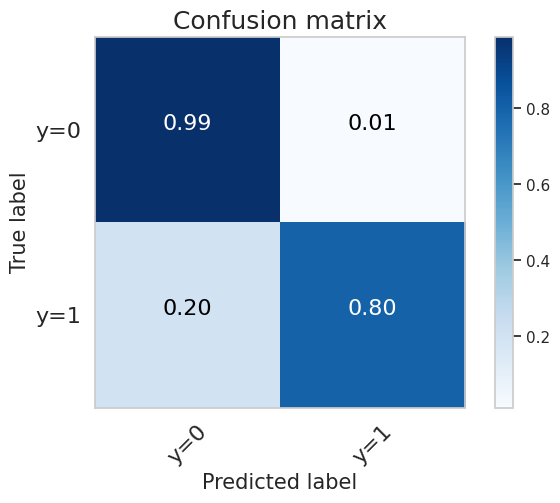

In [69]:
# Compute confusion matrix for the best model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    #Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title(title,fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Add labels to the cells of the confusion matrix.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

print(confusion_matrix(y_test, y_pred, labels=[0,1]))


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=0','y=1'],normalize= True,  title='Confusion matrix')

# Modelo con Redes Neuronales

In [70]:
#DEEP LEARNING
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

#Si la normalización de los datos se hizo previamente podemos omitir este paso
# Scale the data with StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train2.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train2, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the test data
y_pred_proba = model.predict(X_test2)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate metrics
print(f"Model Accuracy: {accuracy_score(y_pred, y_test) * 100:.2f}%")
print(f"Model F1-Score: {f1_score(y_pred, y_test, average='weighted') * 100:.2f}%")
print(classification_report(y_pred, y_test, zero_division=1))

# Calculate accuracies per class
accuracy_class_0 = accuracy_score(y_pred[y_test == 0], y_test[y_test == 0])
accuracy_class_1 = accuracy_score(y_pred[y_test == 1], y_test[y_test == 1])


2024-02-21 22:05:01.414594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 22:05:01.414741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 22:05:01.583693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.3066 - accuracy: 0.8893 - val_loss: 0.2793 - val_accuracy: 0.9047
Epoch 2/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2654 - accuracy: 0.9065 - val_loss: 0.2549 - val_accuracy: 0.9091
Epoch 3/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2489 - accuracy: 0.9113 - val_loss: 0.2433 - val_accuracy: 0.9137
Epoch 4/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2379 - accuracy: 0.9155 - val_loss: 0.2299 - val_accuracy: 0.9195
Epoch 5/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2305 - accuracy: 0.9186 - val_loss: 0.2262 - val_accuracy: 0.9206
Epoch 6/10
3125/3125 [==============================] - 8s 2ms/step - loss: 0.2256 - accuracy: 0.9203 - val_loss: 0.2227 - val_accuracy: 0.9216
Epoch 7/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2214 - accuracy: 0.9216 - val_loss: 0.2210 - val_accuracy:

[[43480  1156]
 [ 3065  5862]]
Normalized confusion matrix
[[0.97 0.03]
 [0.34 0.66]]


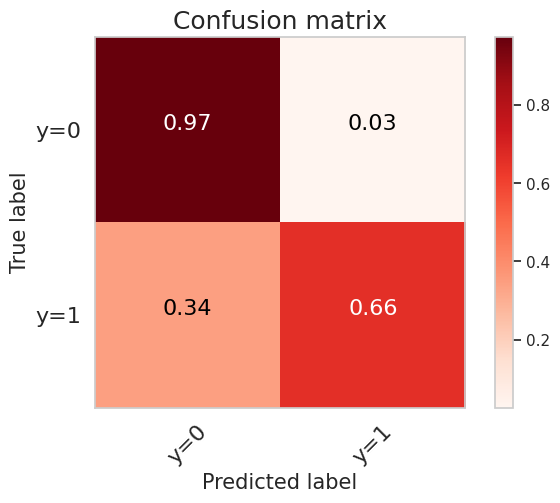

In [71]:
# Compute confusion matrix for the Deep learning model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    #Plot the confusion matrix.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)  # <-- Agregar esta línea para evitar el aviso de deprecación
    plt.title(title,fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Add labels to the cells of the confusion matrix.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=16,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

print(confusion_matrix(y_test, y_pred, labels=[0,1]))


cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y=0','y=1'],normalize= True,  title='Confusion matrix')